# Offshore CIOPS Quantitative Runs

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp
from scipy.stats import binned_statistic_2d, pearsonr
import cmocean.cm as cm
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import datetime as dt

## summer 2017

In [2]:
data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc')

In [3]:
# init_t 3601 refers to the first hour of day 150 = 2017/04/01
# init_t 7992 refers to the last hour of day 333 = 2017/09/30
# the run itself starts on 7992

monS = ['apr', 'may', 'jun', 'jul', 'aug', 'sep']
mon_len = [30, 31, 30, 31, 31, 30]
h = 3601
sum_start = [h, h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24]
sum_end = [h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24, h+sum(mon_len)*24-1]

In [4]:
meander = 0
init = 1
North = 2
Sshelf = 5
Sslope = 4
offshore = 3
sections = [North, Sshelf, Sslope, offshore, meander]
sec_name = ['north', 'south\nshelf', 'south\nslope', 'offshore', 'meander']

In [5]:
apr = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= sum_start[0]) & (data.init_t <= sum_end[0])])/(sum_end[0]-sum_start[0]+1) for sec in sections]
may = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= sum_start[1]) & (data.init_t <= sum_end[1])])/(sum_end[1]-sum_start[1]+1) for sec in sections]
jun = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[2])])/(sum_end[2]-sum_start[2]+1) for sec in sections]
jul = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= sum_start[3]) & (data.init_t <= sum_end[3])])/(sum_end[3]-sum_start[3]+1) for sec in sections]
aug = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= sum_start[4]) & (data.init_t <= sum_end[4])])/(sum_end[4]-sum_start[4]+1) for sec in sections]
sep = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= sum_start[5]) & (data.init_t <= sum_end[5])])/(sum_end[5]-sum_start[5]+1) for sec in sections]

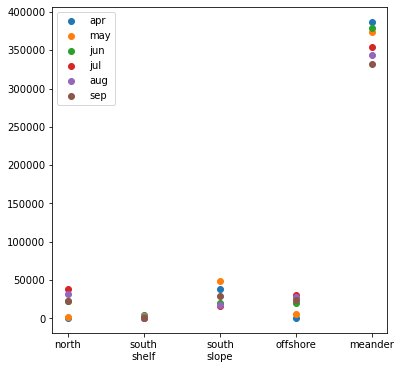

In [6]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

ax.scatter(sec_name, apr, label='apr')
ax.scatter(sec_name, may, label='may')
ax.scatter(sec_name, jun, label='jun')
ax.scatter(sec_name, jul, label='jul')
ax.scatter(sec_name, aug, label='aug')
ax.scatter(sec_name, sep, label='sep')
ax.legend(loc='upper left')

### based on analysis later on in this notebook and looking into the TS diagrams the flow can most easily be deliniated based on whether or not it came from the south or the north
similar to what Saurav did for the summer - therefore confirming that his method was useful for that time period! <br>
looking at the timeseries figure of where water is coming from I'm hesitant to use this confidently for april and may, but definitely happy with it for june, july, august, september

In [7]:
north = [apr[0]/np.sum(apr), may[0]/np.sum(may), jun[0]/np.sum(jun), jul[0]/np.sum(jul), aug[0]/np.sum(aug), sep[0]/np.sum(sep)]
offshore = [apr[3]/np.sum(apr), may[3]/np.sum(may), jun[3]/np.sum(jun), jul[3]/np.sum(jul), aug[3]/np.sum(aug), sep[3]/np.sum(sep)]

mon_sum = [np.sum(apr[:-1]),np.sum(may[:-1]),np.sum(jun[:-1]),np.sum(jul[:-1]),np.sum(aug[:-1]),np.sum(sep[:-1])]

saltdiv = 31.5
cuc = [np.sum(data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.final_depth <= -200) & (data.init_t >= sum_start[i]) & (data.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1)/mon_sum[i] for i in range(len(sum_start))]
south = [np.sum(data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.init_salt >= saltdiv) & (data.final_depth > -200) & (data.init_t >= sum_start[i]) & (data.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1)/mon_sum[i] for i in range(len(sum_start))]
fresh = [np.sum(data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.init_salt < saltdiv) & (data.final_depth > -200) & (data.init_t >= sum_start[i]) & (data.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1)/mon_sum[i] for i in range(len(sum_start))]

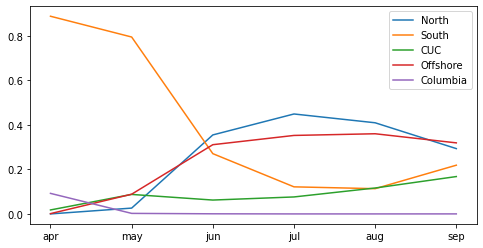

In [8]:
fig, ax = plt.subplots(1,1,figsize=(8,4))

ax.plot(monS, north, label = "North")
ax.plot(monS, south, label = "South")
ax.plot(monS, cuc, label = "CUC")
ax.plot(monS, offshore, label='Offshore')
ax.plot(monS, fresh, label = "Columbia")
# ax.plot(monS, meander, label = "Strait Outflow")
ax.legend()

In [9]:
total = np.sum([jun, jul, aug, sep])

north_bar = np.sum([north[2]*mon_sum[2]/total*100, north[3]*mon_sum[3]/total*100, north[4]*mon_sum[4]/total*100, north[5]*mon_sum[5]/total*100])
offshore_bar = np.sum([offshore[2]*mon_sum[2]/total*100, offshore[3]*mon_sum[3]/total*100, offshore[4]*mon_sum[4]/total*100, offshore[5]*mon_sum[5]/total*100])
cuc_bar = np.sum([cuc[2]*mon_sum[2]/total*100, cuc[3]*mon_sum[3]/total*100, cuc[4]*mon_sum[4]/total*100, cuc[5]*mon_sum[5]/total*100])
south_bar = np.sum([south[2]*mon_sum[2]/total*100, south[3]*mon_sum[3]/total*100, south[4]*mon_sum[4]/total*100, south[5]*mon_sum[5]/total*100]) 
fresh_bar = np.sum([fresh[2]*mon_sum[2]/total*100, fresh[3]*mon_sum[3]/total*100, fresh[4]*mon_sum[4]/total*100, fresh[5]*mon_sum[5]/total*100]) 

Text(0, 0.5, 'Percentage of JdF Inflow')

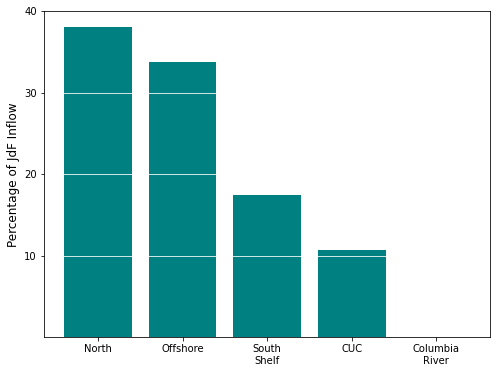

In [10]:
#bar plot of contribution for june, july, august, september
fig, ax = plt.subplots(1,1,figsize=(8,6))
sec_name = ['North', 'Offshore', 'South\nShelf', 'CUC', 'Columbia\nRiver']
# colors = ['magenta', 'orangered', 'teal', 'midnightblue']
colors = ['teal',  'teal',  'teal', 'teal', 'teal', 'teal']
ax.bar(sec_name,[north_bar,offshore_bar, south_bar,cuc_bar, fresh_bar], color=colors)
ax.yaxis.set_ticks([10,20,30,40])
ax.grid(axis = 'y', color='white')
ax.set_ylabel('Percentage of JdF Inflow', fontsize=12)

In [11]:
[north_bar,offshore_bar, south_bar,cuc_bar, fresh_bar]

[38.071321601911,
 33.7846687091897,
 17.462445674052248,
 10.66742222726259,
 0.014141787584472544]

In [12]:
# lets see how much is meandered from the different groups
saltdiv=32
Mfresh = [np.sum(data.final_transp[(data.final_section == 0) & (data.init_salt < saltdiv) & (data.final_depth > -200) & (data.init_t >= sum_start[i]) & (data.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1) for i in range(len(sum_start))]   
Mupwelled = [np.sum(data.final_transp[(data.final_section == 0) & (data.init_salt > saltdiv) & (data.final_depth > -200) & (data.init_t >= sum_start[i]) & (data.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1) for i in range(len(sum_start))]                
Mdeep = [np.sum(data.final_transp[(data.final_section == 0) & (data.final_depth < -200) & (data.init_t >= sum_start[i]) & (data.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1) for i in range(len(sum_start))]                

In [16]:
Mmon_sum = np.sum([Mfresh,Mupwelled,Mdeep], axis=0)

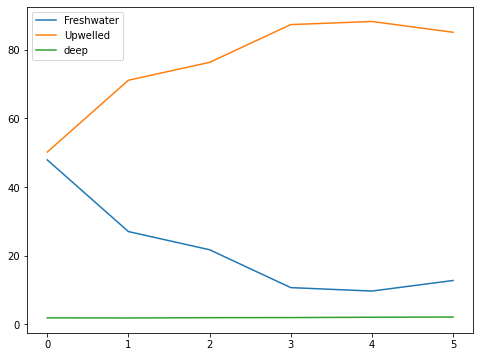

In [17]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(Mfresh/Mmon_sum*100, label='Freshwater')
ax.plot(Mupwelled/Mmon_sum*100, label='Upwelled')
ax.plot(Mdeep/Mmon_sum*100, label='deep')
ax.legend()

## winter 2016/17

In [18]:
dataS=data
data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar17/ariane_positions_quantitative.nc')

In [19]:
# init_t 3601 refers to the first hour of day 150 = 2017/04/01
# init_t 7992 refers to the last hour of day 333 = 2017/09/30
# the run itself starts on 7992

mon16 = ['oct16', 'nov16', 'dec16', 'jan17', 'feb17', 'mar17']
mon_len = [31, 30, 31, 31, 28, 31]
h = 3601
win_start = [h, h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24]
win_end = [h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24, h+sum(mon_len)*24-1]

In [9]:
octo16 = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[0])])/(win_end[0]-win_start[0]+1) for sec in sections]
nov16 = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= win_start[1]) & (data.init_t <= win_end[1])])/(win_end[1]-win_start[1]+1) for sec in sections]
dec16 = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= win_start[2]) & (data.init_t <= win_end[2])])/(win_end[2]-win_start[2]+1) for sec in sections]
jan16 = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= win_start[3]) & (data.init_t <= win_end[3])])/(win_end[3]-win_start[3]+1) for sec in sections]
feb16 = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= win_start[4]) & (data.init_t <= win_end[4])])/(win_end[4]-win_start[4]+1) for sec in sections]
mar16 = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= win_start[5]) & (data.init_t <= win_end[5])])/(win_end[5]-win_start[5]+1) for sec in sections]

In [10]:
sec_name = ['north', 'south\nshelf', 'south\nslope', 'offshore', 'meander']

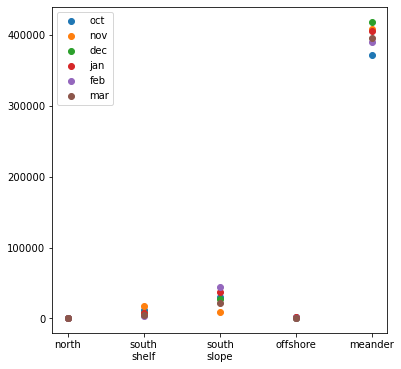

In [11]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

ax.scatter(sec_name, octo16, label='oct')
ax.scatter(sec_name, nov16, label='nov')
ax.scatter(sec_name, dec16, label='dec')
ax.scatter(sec_name, jan16, label='jan')
ax.scatter(sec_name, feb16, label='feb')
ax.scatter(sec_name, mar16, label='mar')
ax.legend(loc='upper left')

In [12]:
mons = np.append(mon16, ['apr17', 'may17'])
saltdiv = 32.5
# mon_sum = np.append([np.sum(data.final_transp[(data.final_section!=0) & (data.init_t >= win_start[i]) & (data.init_t <= win_end[i])])/(win_end[i]-win_start[i]+1) for i in range(len(win_start))],
#                     [np.sum(dataS.final_transp[(dataS.final_section!=0) & (dataS.init_t >= sum_start[i]) & (dataS.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1) for i in [0,1]])
mon_sum = [np.sum(octo16[:-1]), np.sum(nov16[:-1]), np.sum(dec16[:-1]), np.sum(jan16[:-1]), np.sum(feb16[:-1]), np.sum(mar16[:-1]), np.sum(apr[:-1]), np.sum(may[:-1])]

cuc = np.append([np.sum(data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.init_t >= win_start[i]) & (data.final_depth <= -200) & (data.init_t <= win_end[i])])/(win_end[i]-win_start[i]+1)/mon_sum[i] for i in range(len(win_start))],
                [np.sum(dataS.final_transp[np.logical_or((dataS.final_section==Sshelf),(dataS.final_section==Sslope)) & (dataS.final_depth <= -200) & (dataS.init_t >= sum_start[i]) & (dataS.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1)/mon_sum[i+6] for i in [0,1]])

south = np.append([np.sum(data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.init_salt >= saltdiv) & (data.init_t >= win_start[i]) & (data.final_depth > -200) & (data.init_t <= win_end[i])])/(win_end[i]-win_start[i]+1)/mon_sum[i] for i in range(len(win_start))],
                  [np.sum(dataS.final_transp[np.logical_or((dataS.final_section==Sshelf),(dataS.final_section==Sslope)) & (dataS.init_salt >= saltdiv) & (dataS.init_t >= sum_start[i]) & (dataS.final_depth > -200) & (dataS.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1)/mon_sum[i+6] for i in [0,1]])

fresh = np.append([np.sum(data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.init_salt < saltdiv) & (data.final_depth > -200)& (data.init_t >= win_start[i]) & (data.init_t <= win_end[i])])/(win_end[i]-win_start[i]+1)/mon_sum[i] for i in range(len(win_start))],
                  [np.sum(dataS.final_transp[np.logical_or((dataS.final_section==Sshelf),(dataS.final_section==Sslope)) & (dataS.init_salt < saltdiv) & (dataS.final_depth > -200) &(dataS.init_t >= sum_start[i]) & (dataS.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1)/mon_sum[i+6] for i in [0,1]])

north = np.append([np.sum(data.final_transp[(data.final_section==North) & (data.init_t >= win_start[i]) & (data.init_t <= win_end[i])])/(win_end[i]-win_start[i]+1)/mon_sum[i] for i in range(len(win_start))],
                  [np.sum(dataS.final_transp[(dataS.final_section==North) & (dataS.init_t >= sum_start[i]) & (dataS.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1)/mon_sum[i+6] for i in [0,1]])

offshore = np.append([np.sum(data.final_transp[(data.final_section==3) & (data.init_t >= win_start[i]) & (data.init_t <= win_end[i])])/(win_end[i]-win_start[i]+1)/mon_sum[i] for i in range(len(win_start))],
                  [np.sum(dataS.final_transp[(dataS.final_section==3) & (dataS.init_t >= sum_start[i]) & (dataS.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1)/mon_sum[i+6] for i in [0,1]])

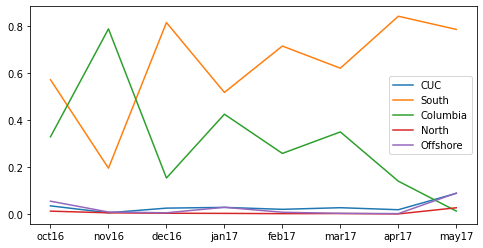

In [13]:
fig, ax = plt.subplots(1,1,figsize=(8,4))

ax.plot(mons, cuc, label = "CUC")
ax.plot(mons, south, label = "South")
ax.plot(mons, fresh, label = "Columbia")
ax.plot(mons, north, label = "North")
ax.plot(mons, offshore, label = "Offshore")
ax.legend()

In [18]:
total = np.sum(mon_sum)
cuc_bar = np.sum([cuc[0]*mon_sum[0]/total*100, cuc[1]*mon_sum[1]/total*100, cuc[2]*mon_sum[2]/total*100, cuc[3]*mon_sum[3]/total*100, cuc[4]*mon_sum[4]/total*100, cuc[5]*mon_sum[5]/total*100,cuc[6]*mon_sum[6]/total*100,cuc[7]*mon_sum[7]/total*100])
south_bar = np.sum([south[0]*mon_sum[0]/total*100, south[1]*mon_sum[1]/total*100, south[2]*mon_sum[2]/total*100, south[3]*mon_sum[3]/total*100, south[4]*mon_sum[4]/total*100, south[5]*mon_sum[5]/total*100,south[6]*mon_sum[6]/total*100,south[7]*mon_sum[7]/total*100])
fresh_bar = np.sum([fresh[0]*mon_sum[0]/total*100, fresh[1]*mon_sum[1]/total*100, fresh[2]*mon_sum[2]/total*100, fresh[3]*mon_sum[3]/total*100, fresh[4]*mon_sum[4]/total*100, fresh[5]*mon_sum[5]/total*100,fresh[6]*mon_sum[6]/total*100,fresh[7]*mon_sum[7]/total*100])
north_bar = np.sum([north[0]*mon_sum[0]/total*100, north[1]*mon_sum[1]/total*100, north[2]*mon_sum[2]/total*100, north[3]*mon_sum[3]/total*100, north[4]*mon_sum[4]/total*100, north[5]*mon_sum[5]/total*100,north[6]*mon_sum[6]/total*100,north[7]*mon_sum[7]/total*100])
offshore_bar = np.sum([offshore[0]*mon_sum[0]/total*100, offshore[1]*mon_sum[1]/total*100, offshore[2]*mon_sum[2]/total*100, offshore[3]*mon_sum[3]/total*100, offshore[4]*mon_sum[4]/total*100, offshore[5]*mon_sum[5]/total*100,offshore[6]*mon_sum[6]/total*100,offshore[7]*mon_sum[7]/total*100])


Text(0, 0.5, 'Percentage of JdF Inflow')

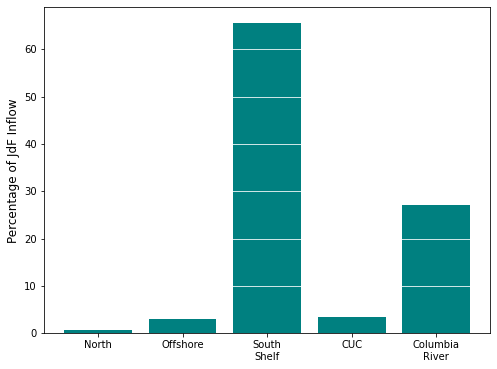

In [19]:
#bar plot of contribution for june, july, august, september
fig, ax = plt.subplots(1,1,figsize=(8,6))
sec_name = [ 'North', 'Offshore', 'South\nShelf', 'CUC', 'Columbia\nRiver']
colors = ['teal',  'teal',  'teal', 'teal', 'teal']
ax.bar(sec_name,[north_bar, offshore_bar, south_bar ,cuc_bar, fresh_bar], color=colors)
# ax.yaxis.set_ticks([10,20,30,40])
ax.grid(axis = 'y', color='white')
ax.set_ylabel('Percentage of JdF Inflow', fontsize=12)

In [20]:
[north_bar, offshore_bar, south_bar ,cuc_bar,fresh_bar]

[0.7588684749316418,
 2.971135534125656,
 65.64301929499757,
 3.44727164922571,
 27.17970504671942]

In [21]:
sum([north_bar, offshore_bar, south_bar ,cuc_bar,fresh_bar])

100.0

In [21]:
# lets see how much is meandered from the different groups
saltdiv=32
Mfresh = [np.sum(data.final_transp[(data.final_section == 0) & (data.init_salt < saltdiv) & (data.final_depth > -200) & (data.init_t >= sum_start[i]) & (data.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1) for i in range(len(sum_start))]   
Mupwelled = [np.sum(data.final_transp[(data.final_section == 0) & (data.init_salt > saltdiv) & (data.final_depth > -200) & (data.init_t >= sum_start[i]) & (data.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1) for i in range(len(sum_start))]                
Mdeep = [np.sum(data.final_transp[(data.final_section == 0) & (data.final_depth < -200) & (data.init_t >= sum_start[i]) & (data.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1) for i in range(len(sum_start))]  

In [22]:
Mmon_sum = np.sum([Mfresh,Mupwelled,Mdeep], axis=0)

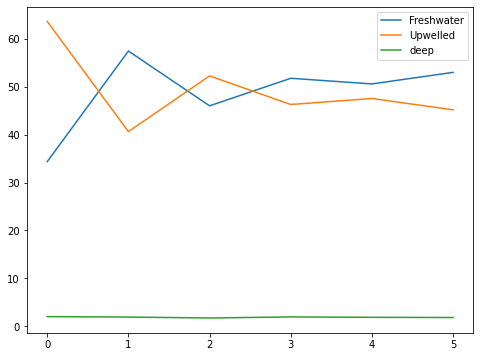

In [23]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(Mfresh/Mmon_sum*100, label='Freshwater')
ax.plot(Mupwelled/Mmon_sum*100, label='Upwelled')
ax.plot(Mdeep/Mmon_sum*100, label='deep')
ax.legend()

## winter 2017/18

In [24]:
data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar18/ariane_positions_quantitative.nc')

In [25]:
# init_t 3601 refers to the first hour of day 150 = 2017/04/01
# init_t 7992 refers to the last hour of day 333 = 2017/09/30
# the run itself starts on 7992

mon17 = ['oct17', 'nov17', 'dec17', 'jan18', 'feb18', 'mar18']
mon_len = [31, 30, 31, 31, 28, 31]
h = 3601
win_start = [h, h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24]
win_end = [h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24, h+sum(mon_len)*24-1]

In [25]:
sec_name = ['South', 'CUC', 'Columbia\nRiver', 'Strait\nOutflow']

In [26]:
octo17 = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[0])])/(win_end[0]-win_start[0]+1) for sec in sections]
nov17 = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= win_start[1]) & (data.init_t <= win_end[1])])/(win_end[1]-win_start[1]+1) for sec in sections]
dec17 = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= win_start[2]) & (data.init_t <= win_end[2])])/(win_end[2]-win_start[2]+1) for sec in sections]
jan17 = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= win_start[3]) & (data.init_t <= win_end[3])])/(win_end[3]-win_start[3]+1) for sec in sections]
feb17 = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= win_start[4]) & (data.init_t <= win_end[4])])/(win_end[4]-win_start[4]+1) for sec in sections]
mar17 = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= win_start[5]) & (data.init_t <= win_end[5])])/(win_end[5]-win_start[5]+1) for sec in sections]

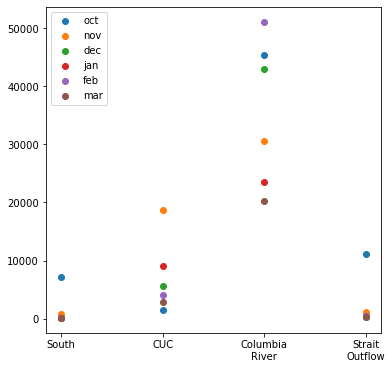

In [27]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

ax.scatter(sec_name, octo17, label='oct')
ax.scatter(sec_name, nov17, label='nov')
ax.scatter(sec_name, dec17, label='dec')
ax.scatter(sec_name, jan17, label='jan')
ax.scatter(sec_name, feb17, label='feb')
ax.scatter(sec_name, mar17, label='mar')
ax.legend(loc='upper left')

In [39]:
# mon_sum = [np.sum(data.final_transp[(data.final_section!=0) & (data.init_t >= win_start[i]) & (data.init_t <= win_end[i])])/(win_end[i]-win_start[i]+1) for i in range(len(win_start))]
mon_sum = [np.sum(octo17), np.sum(nov17), np.sum(dec17), np.sum(jan17), np.sum(feb17), np.sum(mar17)]
salt_div = 31.5
cuc = [np.sum(data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.init_t >= win_start[i]) & (data.final_depth <= -200) & (data.init_t <= win_end[i])])/(win_end[i]-win_start[i]+1)/mon_sum[i] for i in range(len(win_start))]
south = [np.sum(data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.init_salt >= salt_div) & (data.init_t >= win_start[i]) & (data.final_depth > -200) & (data.init_t <= win_end[i])])/(win_end[i]-win_start[i]+1)/mon_sum[i] for i in range(len(win_start))]
fresh = [np.sum(data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.init_salt < salt_div)  & (data.final_depth > -200) & (data.init_t >= win_start[i]) & (data.init_t <= win_end[i])])/(win_end[i]-win_start[i]+1)/mon_sum[i] for i in range(len(win_start))]
north = [np.sum(data.final_transp[(data.final_section==North) & (data.init_t >= win_start[i]) & (data.init_t <= win_end[i])])/(win_end[i]-win_start[i]+1)/mon_sum[i] for i in range(len(win_start))]
offshore = [np.sum(data.final_transp[(data.final_section==3) & (data.init_t >= win_start[i]) & (data.init_t <= win_end[i])])/(win_end[i]-win_start[i]+1)/mon_sum[i] for i in range(len(win_start))]

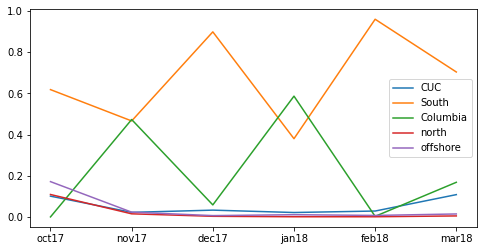

In [40]:
fig, ax = plt.subplots(1,1,figsize=(8,4))

ax.plot(mon17, cuc, label = "CUC")
ax.plot(mon17, south, label = "South")
ax.plot(mon17, fresh, label = "Columbia")
ax.plot(mon17, north, label = "north")
ax.plot(mon17, offshore, label = "offshore")

ax.legend()

In [41]:
total = np.sum(mon_sum)
cuc_bar = np.sum([cuc[0]*mon_sum[0]/total*100, cuc[1]*mon_sum[1]/total*100, cuc[2]*mon_sum[2]/total*100, cuc[3]*mon_sum[3]/total*100, cuc[4]*mon_sum[4]/total*100, cuc[5]*mon_sum[5]/total*100]) #,cuc[6]*mon_sum[6]/total*100])
south_bar = np.sum([south[0]*mon_sum[0]/total*100, south[1]*mon_sum[1]/total*100, south[2]*mon_sum[2]/total*100, south[3]*mon_sum[3]/total*100, south[4]*mon_sum[4]/total*100, south[5]*mon_sum[5]/total*100]) #,cuc[6]*mon_sum[6]/total*100])
fresh_bar = np.sum([fresh[0]*mon_sum[0]/total*100, fresh[1]*mon_sum[1]/total*100, fresh[2]*mon_sum[2]/total*100, fresh[3]*mon_sum[3]/total*100, fresh[4]*mon_sum[4]/total*100, fresh[5]*mon_sum[5]/total*100])
north_bar = np.sum([north[0]*mon_sum[0]/total*100, north[1]*mon_sum[1]/total*100, north[2]*mon_sum[2]/total*100, north[3]*mon_sum[3]/total*100, north[4]*mon_sum[4]/total*100, north[5]*mon_sum[5]/total*100])
offshore_bar = np.sum([offshore[0]*mon_sum[0]/total*100, offshore[1]*mon_sum[1]/total*100, offshore[2]*mon_sum[2]/total*100, offshore[3]*mon_sum[3]/total*100, offshore[4]*mon_sum[4]/total*100, offshore[5]*mon_sum[5]/total*100])

Text(0, 0.5, 'Percentage of JdF Inflow')

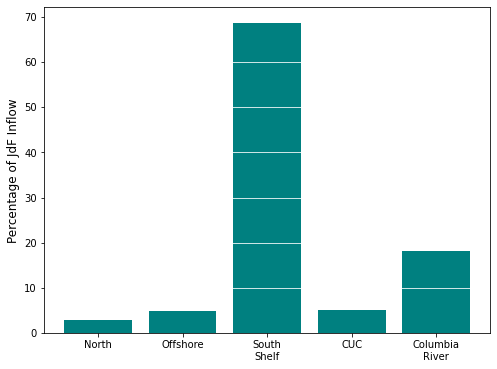

In [42]:
#bar plot of contribution for june, july, august, september
fig, ax = plt.subplots(1,1,figsize=(8,6))
sec_name = ['North', 'Offshore', 'South\nShelf', 'CUC', 'Columbia\nRiver']
colors = ['teal',  'teal',  'teal', 'teal', 'teal']
ax.bar(sec_name,[north_bar, offshore_bar, south_bar ,cuc_bar, fresh_bar], color=colors)
# ax.yaxis.set_ticks([10,20,30,40])
ax.grid(axis = 'y', color='white')
ax.set_ylabel('Percentage of JdF Inflow', fontsize=12)

In [43]:
[north_bar, offshore_bar, south_bar ,cuc_bar,fresh_bar]

[2.984656295912864,
 4.989913356906071,
 68.70822307908061,
 5.132452678277142,
 18.184754589823314]

In [47]:
 67.98358680504738 - 65.64301929499757

2.3405675100498087

In [26]:
# lets see how much is meandered from the different groups
saltdiv=32
Mfresh = [np.sum(data.final_transp[(data.final_section == 0) & (data.init_salt < saltdiv) & (data.final_depth > -200) & (data.init_t >= sum_start[i]) & (data.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1) for i in range(len(sum_start))]   
Mupwelled = [np.sum(data.final_transp[(data.final_section == 0) & (data.init_salt > saltdiv) & (data.final_depth > -200) & (data.init_t >= sum_start[i]) & (data.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1) for i in range(len(sum_start))]                
Mdeep = [np.sum(data.final_transp[(data.final_section == 0) & (data.final_depth < -200) & (data.init_t >= sum_start[i]) & (data.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1) for i in range(len(sum_start))]  

In [27]:
Mmon_sum = np.sum([Mfresh,Mupwelled,Mdeep], axis=0)

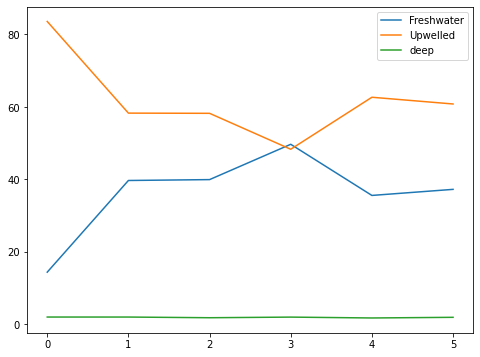

In [28]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(Mfresh/Mmon_sum*100, label='Freshwater')
ax.plot(Mupwelled/Mmon_sum*100, label='Upwelled')
ax.plot(Mdeep/Mmon_sum*100, label='deep')
ax.legend()

### bring it all together - try daily instead of monthly?

In [5]:
mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar17/ariane_positions_quantitative.nc')
h = 3601
start = [h+24*i for i in range(182)]

fresh16 = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.init_salt < 32.4) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
cuc16 = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.init_salt >= 32.4) & (mydata.final_depth <= -200) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
south16 = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.init_salt >= 32.4) & (mydata.final_depth > -200) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
north16 = [np.sum(mydata.final_transp[(mydata.final_section==North) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
offshore16 = [np.sum(mydata.final_transp[(mydata.final_section==3) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc')
h = 3601
start = [h+24*i for i in range(183)]

freshS = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.init_salt < 32.4) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
cucS = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.init_salt >= 32.4) & (mydata.final_depth <= -200) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
southS = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.init_salt >= 32.4) & (mydata.final_depth > -200) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
northS = [np.sum(mydata.final_transp[(mydata.final_section==North) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
offshoreS = [np.sum(mydata.final_transp[(mydata.final_section==3) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar18/ariane_positions_quantitative.nc')
h = 3601
start = [h+24*i for i in range(182)]

fresh17 = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.init_salt < 32.4) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
cuc17 = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.init_salt >= 32.4) & (mydata.final_depth <= -200) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
south17 = [np.sum(mydata.final_transp[np.logical_or((mydata.final_section==Sshelf),(mydata.final_section==Sslope)) & (mydata.init_salt >= 32.4) & (mydata.final_depth > -200) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
north17 = [np.sum(mydata.final_transp[(mydata.final_section==North) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
offshore17 = [np.sum(mydata.final_transp[(mydata.final_section==3) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]

fresh = np.append(np.append(fresh16, freshS), fresh17)
south = np.append(np.append(south16, southS), south17)
north = np.append(np.append(north16, northS), north17)
cuc = np.append(np.append(cuc16, cucS), cuc17)
offshore = np.append(np.append(offshore16, offshoreS), offshore17)

In [6]:
dates = [dt.datetime(2016,10,1)+dt.timedelta(days=i) for i in range(len(cuc))]

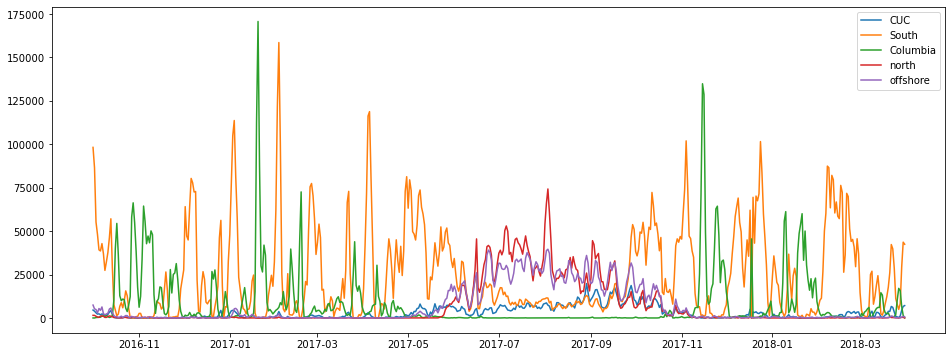

In [7]:
fig, ax = plt.subplots(1,1, figsize=(16,6))

ax.plot(dates, cuc, label = "CUC")
ax.plot(dates, south, label = "South")
ax.plot(dates, fresh, label = "Columbia")
ax.plot(dates, north, label = "north")
ax.plot(dates, offshore, label = "offshore")
ax.legend(loc='upper right')
# ax.set_ylim([0,55000]);

In [23]:
# lets calculate the peason's correlation coefficient between north and offhsore in the summer
corr, _ = pearsonr(north[243:364], offshore[243:364])
print('Pearsons correlation with offshore: %.3f' % corr)
corr, _ = pearsonr(north[243:364], cuc[243:364])
print('Pearsons correlation with cuc: %.3f' % corr)
corr, _ = pearsonr(north[243:364], south[243:364])
print('Pearsons correlation with south: %.3f' % corr)

Pearsons correlation with offshore: 0.726
Pearsons correlation with cuc: 0.023
Pearsons correlation with south: -0.161


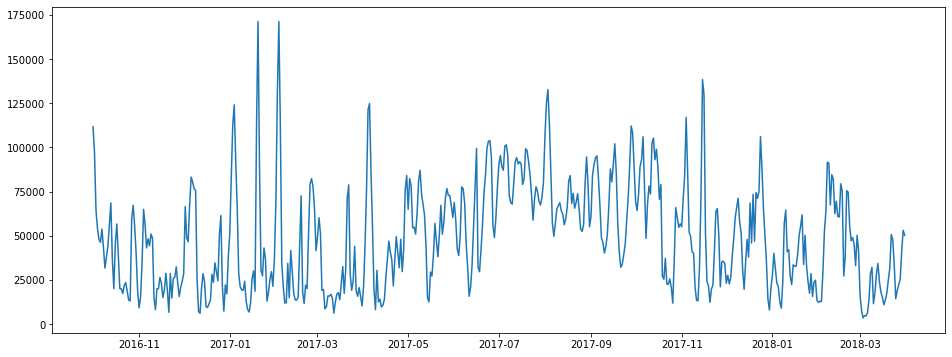

In [48]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
ax.plot(dates, np.sum([cuc,south,fresh,north,offshore],axis=0))
# ax.set_ylim([0,90000]);

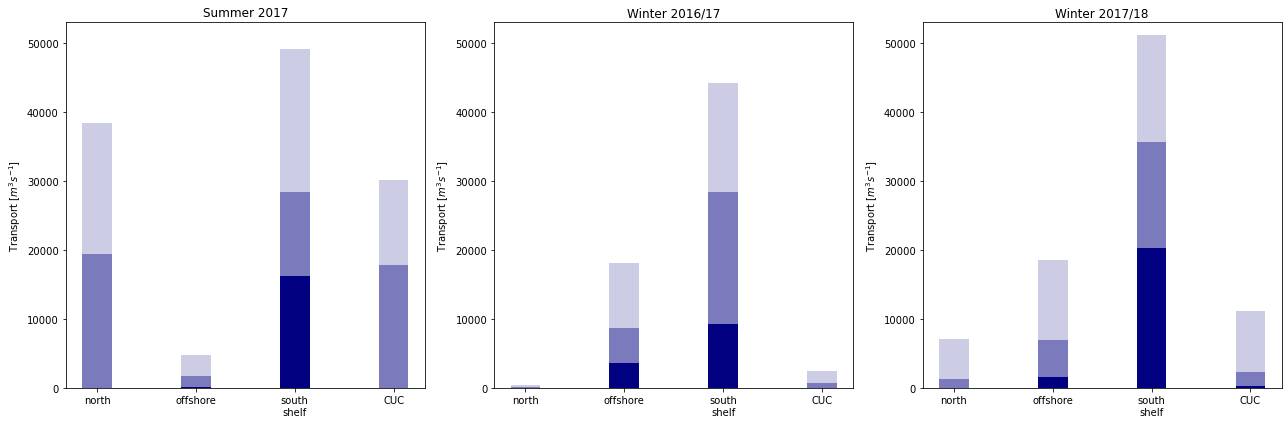

In [27]:
fig, ax = plt.subplots(1,3, figsize=(18,6))

y = [apr, may, jun, jul, aug, sep]
mean = np.mean(y,axis=0)
mini = np.min(y,axis=0)
maxi = np.max(y,axis=0)

ax[0].bar(sec_name,maxi,width = 0.3,color='navy',alpha=0.2,label='max')
ax[0].bar(sec_name,mean,width = 0.3, color='navy',alpha=0.4,label='mean')
ax[0].bar(sec_name, mini,width = 0.3, color='navy',label='min')

ax[0].set_title('Summer 2017')
ax[0].set_ylim([0,53000])
ax[0].set_ylabel('Transport [$m^{3}s^{-1}$]')

y = [octo16, nov16, dec16, jan16, feb16, mar16]
mean = np.mean(y,axis=0)
mini = np.min(y,axis=0)
maxi = np.max(y,axis=0)

ax[1].bar(sec_name,maxi,width = 0.3,color='navy',alpha=0.2,label='max')
ax[1].bar(sec_name,mean,width = 0.3, color='navy',alpha=0.4,label='mean')
ax[1].bar(sec_name, mini,width = 0.3, color='navy',label='min')

ax[1].set_title('Winter 2016/17')
ax[1].set_ylim([0,53000])
ax[1].set_ylabel('Transport [$m^{3}s^{-1}$]')

y = [octo17, nov17, dec17, jan17, feb17, mar17]
mean = np.mean(y,axis=0)
mini = np.min(y,axis=0)
maxi = np.max(y,axis=0)

ax[2].bar(sec_name,maxi,width = 0.3,color='navy',alpha=0.2,label='max')
ax[2].bar(sec_name,mean,width = 0.3, color='navy',alpha=0.4,label='mean')
ax[2].bar(sec_name, mini,width = 0.3, color='navy',label='min')

ax[2].set_title('Winter 2017/18')
ax[2].set_ylabel('Transport [$m^{3}s^{-1}$]')
ax[2].set_ylim([0,53000])
plt.tight_layout()

## Histogram - top 50 m of inflow

In [28]:
mymesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')
depthf = interp.interp1d(mymesh.z, mymesh.gdept_1d)

In [29]:
data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc')

aprTop = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') <= 50.0) & (data.init_t >= sum_start[0]) & (data.init_t <= sum_end[0])])/(sum_end[0]-sum_start[0]+1) for sec in sections]
mayTop = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') <= 50.0) & (data.init_t >= sum_start[1]) & (data.init_t <= sum_end[1])])/(sum_end[1]-sum_start[1]+1) for sec in sections]
junTop = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') <= 50.0) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[2])])/(sum_end[2]-sum_start[2]+1) for sec in sections]
julTop = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') <= 50.0) & (data.init_t >= sum_start[3]) & (data.init_t <= sum_end[3])])/(sum_end[3]-sum_start[3]+1) for sec in sections]
augTop = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') <= 50.0) & (data.init_t >= sum_start[4]) & (data.init_t <= sum_end[4])])/(sum_end[4]-sum_start[4]+1) for sec in sections]
sepTop = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') <= 50.0) & (data.init_t >= sum_start[5]) & (data.init_t <= sum_end[5])])/(sum_end[5]-sum_start[5]+1) for sec in sections]

data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar17/ariane_positions_quantitative.nc')

octo16Top = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') <= 50.0) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[0])])/(win_end[0]-win_start[0]+1) for sec in sections]
nov16Top = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') <= 50.0) & (data.init_t >= win_start[1]) & (data.init_t <= win_end[1])])/(win_end[1]-win_start[1]+1) for sec in sections]
dec16Top = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') <= 50.0) & (data.init_t >= win_start[2]) & (data.init_t <= win_end[2])])/(win_end[2]-win_start[2]+1) for sec in sections]
jan16Top = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') <= 50.0) & (data.init_t >= win_start[3]) & (data.init_t <= win_end[3])])/(win_end[3]-win_start[3]+1) for sec in sections]
feb16Top = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') <= 50.0) & (data.init_t >= win_start[4]) & (data.init_t <= win_end[4])])/(win_end[4]-win_start[4]+1) for sec in sections]
mar16Top = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') <= 50.0) & (data.init_t >= win_start[5]) & (data.init_t <= win_end[5])])/(win_end[5]-win_start[5]+1) for sec in sections]

data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar18/ariane_positions_quantitative.nc')

octo17Top = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') <= 50.0) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[0])])/(win_end[0]-win_start[0]+1) for sec in sections]
nov17Top = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') <= 50.0) & (data.init_t >= win_start[1]) & (data.init_t <= win_end[1])])/(win_end[1]-win_start[1]+1) for sec in sections]
dec17Top = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') <= 50.0) & (data.init_t >= win_start[2]) & (data.init_t <= win_end[2])])/(win_end[2]-win_start[2]+1) for sec in sections]
jan17Top = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') <= 50.0) & (data.init_t >= win_start[3]) & (data.init_t <= win_end[3])])/(win_end[3]-win_start[3]+1) for sec in sections]
feb17Top = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') <= 50.0) & (data.init_t >= win_start[4]) & (data.init_t <= win_end[4])])/(win_end[4]-win_start[4]+1) for sec in sections]
mar17Top = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') <= 50.0) & (data.init_t >= win_start[5]) & (data.init_t <= win_end[5])])/(win_end[5]-win_start[5]+1) for sec in sections]

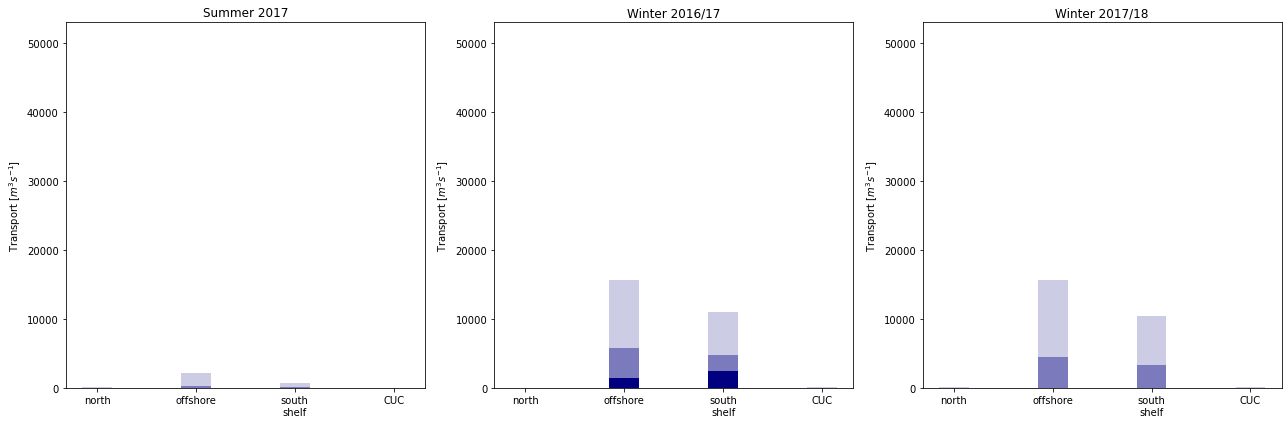

In [30]:
fig, ax = plt.subplots(1,3, figsize=(18,6))

y = [aprTop, mayTop, junTop, julTop, augTop, sepTop]
mean = np.mean(y,axis=0)
mini = np.min(y,axis=0)
maxi = np.max(y,axis=0)

ax[0].bar(sec_name,maxi,width = 0.3,color='navy',alpha=0.2,label='max')
ax[0].bar(sec_name,mean,width = 0.3, color='navy',alpha=0.4,label='mean')
ax[0].bar(sec_name, mini,width = 0.3, color='navy',label='min')

ax[0].set_title('Summer 2017')
ax[0].set_ylim([0,53000])
ax[0].set_ylabel('Transport [$m^{3}s^{-1}$]')

y = [octo16Top, nov16Top, dec16Top, jan16Top, feb16Top, mar16Top]
mean = np.mean(y,axis=0)
mini = np.min(y,axis=0)
maxi = np.max(y,axis=0)

ax[1].bar(sec_name,maxi,width = 0.3,color='navy',alpha=0.2,label='max')
ax[1].bar(sec_name,mean,width = 0.3, color='navy',alpha=0.4,label='mean')
ax[1].bar(sec_name, mini,width = 0.3, color='navy',label='min')

ax[1].set_title('Winter 2016/17')
ax[1].set_ylim([0,53000])
ax[1].set_ylabel('Transport [$m^{3}s^{-1}$]')

y = [octo17Top, nov17Top, dec17Top, jan17Top, feb17Top, mar17Top]
mean = np.mean(y,axis=0)
mini = np.min(y,axis=0)
maxi = np.max(y,axis=0)

ax[2].bar(sec_name,maxi,width = 0.3,color='navy',alpha=0.2,label='max')
ax[2].bar(sec_name,mean,width = 0.3, color='navy',alpha=0.4,label='mean')
ax[2].bar(sec_name, mini,width = 0.3, color='navy',label='min')

ax[2].set_title('Winter 2017/18')
ax[2].set_ylabel('Transport [$m^{3}s^{-1}$]')
ax[2].set_ylim([0,53000])
plt.tight_layout()

## Histogram - bellow 50 m inflow

In [31]:
data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc')

aprBot = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') > 50.0) & (data.init_t >= sum_start[0]) & (data.init_t <= sum_end[0])])/(sum_end[0]-sum_start[0]+1) for sec in sections]
mayBot = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') > 50.0) & (data.init_t >= sum_start[1]) & (data.init_t <= sum_end[1])])/(sum_end[1]-sum_start[1]+1) for sec in sections]
junBot = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') > 50.0) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[2])])/(sum_end[2]-sum_start[2]+1) for sec in sections]
julBot = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') > 50.0) & (data.init_t >= sum_start[3]) & (data.init_t <= sum_end[3])])/(sum_end[3]-sum_start[3]+1) for sec in sections]
augBot = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') > 50.0) & (data.init_t >= sum_start[4]) & (data.init_t <= sum_end[4])])/(sum_end[4]-sum_start[4]+1) for sec in sections]
sepBot = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') > 50.0) & (data.init_t >= sum_start[5]) & (data.init_t <= sum_end[5])])/(sum_end[5]-sum_start[5]+1) for sec in sections]

data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar17/ariane_positions_quantitative.nc')

octo16Bot = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') > 50.0) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[0])])/(win_end[0]-win_start[0]+1) for sec in sections]
nov16Bot = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') > 50.0) & (data.init_t >= win_start[1]) & (data.init_t <= win_end[1])])/(win_end[1]-win_start[1]+1) for sec in sections]
dec16Bot = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') > 50.0) & (data.init_t >= win_start[2]) & (data.init_t <= win_end[2])])/(win_end[2]-win_start[2]+1) for sec in sections]
jan16Bot = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') > 50.0) & (data.init_t >= win_start[3]) & (data.init_t <= win_end[3])])/(win_end[3]-win_start[3]+1) for sec in sections]
feb16Bot = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') > 50.0) & (data.init_t >= win_start[4]) & (data.init_t <= win_end[4])])/(win_end[4]-win_start[4]+1) for sec in sections]
mar16Bot = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') > 50.0) & (data.init_t >= win_start[5]) & (data.init_t <= win_end[5])])/(win_end[5]-win_start[5]+1) for sec in sections]

data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar18/ariane_positions_quantitative.nc')

octo17Bot = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') > 50.0) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[0])])/(win_end[0]-win_start[0]+1) for sec in sections]
nov17Bot = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') > 50.0) & (data.init_t >= win_start[1]) & (data.init_t <= win_end[1])])/(win_end[1]-win_start[1]+1) for sec in sections]
dec17Bot = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') > 50.0) & (data.init_t >= win_start[2]) & (data.init_t <= win_end[2])])/(win_end[2]-win_start[2]+1) for sec in sections]
jan17Bot = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') > 50.0) & (data.init_t >= win_start[3]) & (data.init_t <= win_end[3])])/(win_end[3]-win_start[3]+1) for sec in sections]
feb17Bot = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') > 50.0) & (data.init_t >= win_start[4]) & (data.init_t <= win_end[4])])/(win_end[4]-win_start[4]+1) for sec in sections]
mar17Bot = [np.sum(data.final_transp[(data.final_section==sec) & (xr.DataArray(depthf(data.init_z)[0],dims='ntraj') > 50.0) & (data.init_t >= win_start[5]) & (data.init_t <= win_end[5])])/(win_end[5]-win_start[5]+1) for sec in sections]

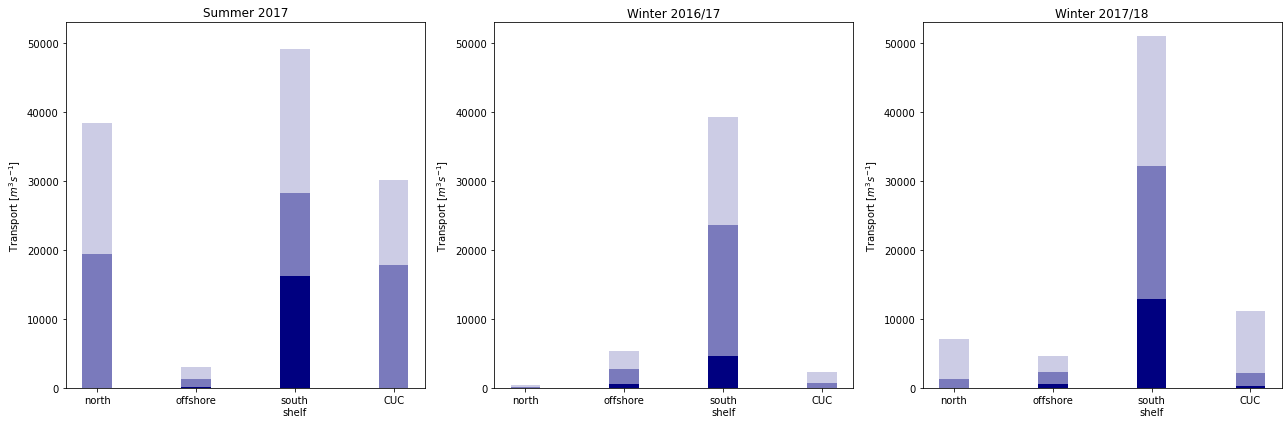

In [32]:
fig, ax = plt.subplots(1,3, figsize=(18,6))

y = [aprBot, mayBot, junBot, julBot, augBot, sepBot]
mean = np.mean(y,axis=0)
mini = np.min(y,axis=0)
maxi = np.max(y,axis=0)

ax[0].bar(sec_name,maxi,width = 0.3,color='navy',alpha=0.2,label='max')
ax[0].bar(sec_name,mean,width = 0.3, color='navy',alpha=0.4,label='mean')
ax[0].bar(sec_name, mini,width = 0.3, color='navy',label='min')

ax[0].set_title('Summer 2017')
ax[0].set_ylim([0,53000])
ax[0].set_ylabel('Transport [$m^{3}s^{-1}$]')

y = [octo16Bot, nov16Bot, dec16Bot, jan16Bot, feb16Bot, mar16Bot]
mean = np.mean(y,axis=0)
mini = np.min(y,axis=0)
maxi = np.max(y,axis=0)

ax[1].bar(sec_name,maxi,width = 0.3,color='navy',alpha=0.2,label='max')
ax[1].bar(sec_name,mean,width = 0.3, color='navy',alpha=0.4,label='mean')
ax[1].bar(sec_name, mini,width = 0.3, color='navy',label='min')

ax[1].set_title('Winter 2016/17')
ax[1].set_ylim([0,53000])
ax[1].set_ylabel('Transport [$m^{3}s^{-1}$]')

y = [octo17Bot, nov17Bot, dec17Bot, jan17Bot, feb17Bot, mar17Bot]
mean = np.mean(y,axis=0)
mini = np.min(y,axis=0)
maxi = np.max(y,axis=0)

ax[2].bar(sec_name,maxi,width = 0.3,color='navy',alpha=0.2,label='max')
ax[2].bar(sec_name,mean,width = 0.3, color='navy',alpha=0.4,label='mean')
ax[2].bar(sec_name, mini,width = 0.3, color='navy',label='min')

ax[2].set_title('Winter 2017/18')
ax[2].set_ylabel('Transport [$m^{3}s^{-1}$]')
ax[2].set_ylim([0,53000])
plt.tight_layout()

In [33]:
# NEXT - transport weighted histograms of the tracers

In [34]:
Sdata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc')

Fapr = (Sdata.init_transp[(Sdata.final_section != 0) & (Sdata.init_t >= sum_start[0]) & (Sdata.init_t <= sum_end[0])])/(sum_end[0]-sum_start[0]+1)
Fmay = (Sdata.init_transp[(Sdata.final_section != 0) & (Sdata.init_t >= sum_start[1]) & (Sdata.init_t <= sum_end[1])])/(sum_end[1]-sum_start[1]+1)
Fjun = (Sdata.init_transp[(Sdata.final_section != 0) & (Sdata.init_t >= sum_start[2]) & (Sdata.init_t <= sum_end[2])])/(sum_end[2]-sum_start[2]+1)
Fjul = (Sdata.init_transp[(Sdata.final_section != 0) & (Sdata.init_t >= sum_start[3]) & (Sdata.init_t <= sum_end[3])])/(sum_end[3]-sum_start[3]+1)
Faug = (Sdata.init_transp[(Sdata.final_section != 0) & (Sdata.init_t >= sum_start[4]) & (Sdata.init_t <= sum_end[4])])/(sum_end[4]-sum_start[4]+1)
Fsep = (Sdata.init_transp[(Sdata.final_section != 0) & (Sdata.init_t >= sum_start[5]) & (Sdata.init_t <= sum_end[5])])/(sum_end[5]-sum_start[5]+1)

Sapr = (Sdata.init_salt[(Sdata.final_section != 0) & (Sdata.init_t >= sum_start[0]) & (Sdata.init_t <= sum_end[0])])
Smay = (Sdata.init_salt[(Sdata.final_section != 0) & (Sdata.init_t >= sum_start[1]) & (Sdata.init_t <= sum_end[1])])
Sjun = (Sdata.init_salt[(Sdata.final_section != 0) & (Sdata.init_t >= sum_start[2]) & (Sdata.init_t <= sum_end[2])])
Sjul = (Sdata.init_salt[(Sdata.final_section != 0) & (Sdata.init_t >= sum_start[3]) & (Sdata.init_t <= sum_end[3])])
Saug = (Sdata.init_salt[(Sdata.final_section != 0) & (Sdata.init_t >= sum_start[4]) & (Sdata.init_t <= sum_end[4])])
Ssep = (Sdata.init_salt[(Sdata.final_section != 0) & (Sdata.init_t >= sum_start[5]) & (Sdata.init_t <= sum_end[5])])

Tapr = (Sdata.init_temp[(Sdata.final_section != 0) & (Sdata.init_t >= sum_start[0]) & (Sdata.init_t <= sum_end[0])])
Tmay = (Sdata.init_temp[(Sdata.final_section != 0) & (Sdata.init_t >= sum_start[1]) & (Sdata.init_t <= sum_end[1])])
Tjun = (Sdata.init_temp[(Sdata.final_section != 0) & (Sdata.init_t >= sum_start[2]) & (Sdata.init_t <= sum_end[2])])
Tjul = (Sdata.init_temp[(Sdata.final_section != 0) & (Sdata.init_t >= sum_start[3]) & (Sdata.init_t <= sum_end[3])])
Taug = (Sdata.init_temp[(Sdata.final_section != 0) & (Sdata.init_t >= sum_start[4]) & (Sdata.init_t <= sum_end[4])])
Tsep = (Sdata.init_temp[(Sdata.final_section != 0) & (Sdata.init_t >= sum_start[5]) & (Sdata.init_t <= sum_end[5])])

In [35]:
Wdata16 = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar17/ariane_positions_quantitative.nc')

Foct16 = (Wdata16.init_transp[(Wdata16.final_section != 0) & (Wdata16.init_t >= win_start[0]) & (Wdata16.init_t <= win_end[0])])/(win_end[0]-win_start[0]+1)
Fnov16 = (Wdata16.init_transp[(Wdata16.final_section != 0) & (Wdata16.init_t >= win_start[1]) & (Wdata16.init_t <= win_end[1])])/(win_end[1]-win_start[1]+1)
Fdec16 = (Wdata16.init_transp[(Wdata16.final_section != 0) & (Wdata16.init_t >= win_start[2]) & (Wdata16.init_t <= win_end[2])])/(win_end[2]-win_start[2]+1)
Fjan16 = (Wdata16.init_transp[(Wdata16.final_section != 0) & (Wdata16.init_t >= win_start[3]) & (Wdata16.init_t <= win_end[3])])/(win_end[3]-win_start[3]+1)
Ffeb16 = (Wdata16.init_transp[(Wdata16.final_section != 0) & (Wdata16.init_t >= win_start[4]) & (Wdata16.init_t <= win_end[4])])/(win_end[4]-win_start[4]+1)
Fmar16 = (Wdata16.init_transp[(Wdata16.final_section != 0) & (Wdata16.init_t >= win_start[5]) & (Wdata16.init_t <= win_end[5])])/(win_end[5]-win_start[5]+1)

Soct16 = (Wdata16.init_salt[(Wdata16.final_section != 0) & (Wdata16.init_t >= win_start[0]) & (Wdata16.init_t <= win_end[0])])
Snov16 = (Wdata16.init_salt[(Wdata16.final_section != 0) & (Wdata16.init_t >= win_start[1]) & (Wdata16.init_t <= win_end[1])])
Sdec16 = (Wdata16.init_salt[(Wdata16.final_section != 0) & (Wdata16.init_t >= win_start[2]) & (Wdata16.init_t <= win_end[2])])
Sjan16 = (Wdata16.init_salt[(Wdata16.final_section != 0) & (Wdata16.init_t >= win_start[3]) & (Wdata16.init_t <= win_end[3])])
Sfeb16 = (Wdata16.init_salt[(Wdata16.final_section != 0) & (Wdata16.init_t >= win_start[4]) & (Wdata16.init_t <= win_end[4])])
Smar16 = (Wdata16.init_salt[(Wdata16.final_section != 0) & (Wdata16.init_t >= win_start[5]) & (Wdata16.init_t <= win_end[5])])

Toct16 = (Wdata16.init_temp[(Wdata16.final_section != 0) & (Wdata16.init_t >= win_start[0]) & (Wdata16.init_t <= win_end[0])])
Tnov16 = (Wdata16.init_temp[(Wdata16.final_section != 0) & (Wdata16.init_t >= win_start[1]) & (Wdata16.init_t <= win_end[1])])
Tdec16 = (Wdata16.init_temp[(Wdata16.final_section != 0) & (Wdata16.init_t >= win_start[2]) & (Wdata16.init_t <= win_end[2])])
Tjan16 = (Wdata16.init_temp[(Wdata16.final_section != 0) & (Wdata16.init_t >= win_start[3]) & (Wdata16.init_t <= win_end[3])])
Tfeb16 = (Wdata16.init_temp[(Wdata16.final_section != 0) & (Wdata16.init_t >= win_start[4]) & (Wdata16.init_t <= win_end[4])])
Tmar16 = (Wdata16.init_temp[(Wdata16.final_section != 0) & (Wdata16.init_t >= win_start[5]) & (Wdata16.init_t <= win_end[5])])

In [36]:
Wdata17 = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar18/ariane_positions_quantitative.nc')

Foct17 = (Wdata17.init_transp[(Wdata17.final_section != 0) & (Wdata17.init_t >= win_start[0]) & (Wdata17.init_t <= win_end[0])])/(win_end[0]-win_start[0]+1)
Fnov17 = (Wdata17.init_transp[(Wdata17.final_section != 0) & (Wdata17.init_t >= win_start[1]) & (Wdata17.init_t <= win_end[1])])/(win_end[1]-win_start[1]+1)
Fdec17 = (Wdata17.init_transp[(Wdata17.final_section != 0) & (Wdata17.init_t >= win_start[2]) & (Wdata17.init_t <= win_end[2])])/(win_end[2]-win_start[2]+1)
Fjan17 = (Wdata17.init_transp[(Wdata17.final_section != 0) & (Wdata17.init_t >= win_start[3]) & (Wdata17.init_t <= win_end[3])])/(win_end[3]-win_start[3]+1)
Ffeb17 = (Wdata17.init_transp[(Wdata17.final_section != 0) & (Wdata17.init_t >= win_start[4]) & (Wdata17.init_t <= win_end[4])])/(win_end[4]-win_start[4]+1)
Fmar17 = (Wdata17.init_transp[(Wdata17.final_section != 0) & (Wdata17.init_t >= win_start[5]) & (Wdata17.init_t <= win_end[5])])/(win_end[5]-win_start[5]+1)

Soct17 = (Wdata17.init_salt[(Wdata17.final_section != 0) & (Wdata17.init_t >= win_start[0]) & (Wdata17.init_t <= win_end[0])])
Snov17 = (Wdata17.init_salt[(Wdata17.final_section != 0) & (Wdata17.init_t >= win_start[1]) & (Wdata17.init_t <= win_end[1])])
Sdec17 = (Wdata17.init_salt[(Wdata17.final_section != 0) & (Wdata17.init_t >= win_start[2]) & (Wdata17.init_t <= win_end[2])])
Sjan17 = (Wdata17.init_salt[(Wdata17.final_section != 0) & (Wdata17.init_t >= win_start[3]) & (Wdata17.init_t <= win_end[3])])
Sfeb17 = (Wdata17.init_salt[(Wdata17.final_section != 0) & (Wdata17.init_t >= win_start[4]) & (Wdata17.init_t <= win_end[4])])
Smar17 = (Wdata17.init_salt[(Wdata17.final_section != 0) & (Wdata17.init_t >= win_start[5]) & (Wdata17.init_t <= win_end[5])])

Toct17 = (Wdata17.init_temp[(Wdata17.final_section != 0) & (Wdata17.init_t >= win_start[0]) & (Wdata17.init_t <= win_end[0])])
Tnov17 = (Wdata17.init_temp[(Wdata17.final_section != 0) & (Wdata17.init_t >= win_start[1]) & (Wdata17.init_t <= win_end[1])])
Tdec17 = (Wdata17.init_temp[(Wdata17.final_section != 0) & (Wdata17.init_t >= win_start[2]) & (Wdata17.init_t <= win_end[2])])
Tjan17 = (Wdata17.init_temp[(Wdata17.final_section != 0) & (Wdata17.init_t >= win_start[3]) & (Wdata17.init_t <= win_end[3])])
Tfeb17 = (Wdata17.init_temp[(Wdata17.final_section != 0) & (Wdata17.init_t >= win_start[4]) & (Wdata17.init_t <= win_end[4])])
Tmar17 = (Wdata17.init_temp[(Wdata17.final_section != 0) & (Wdata17.init_t >= win_start[5]) & (Wdata17.init_t <= win_end[5])])

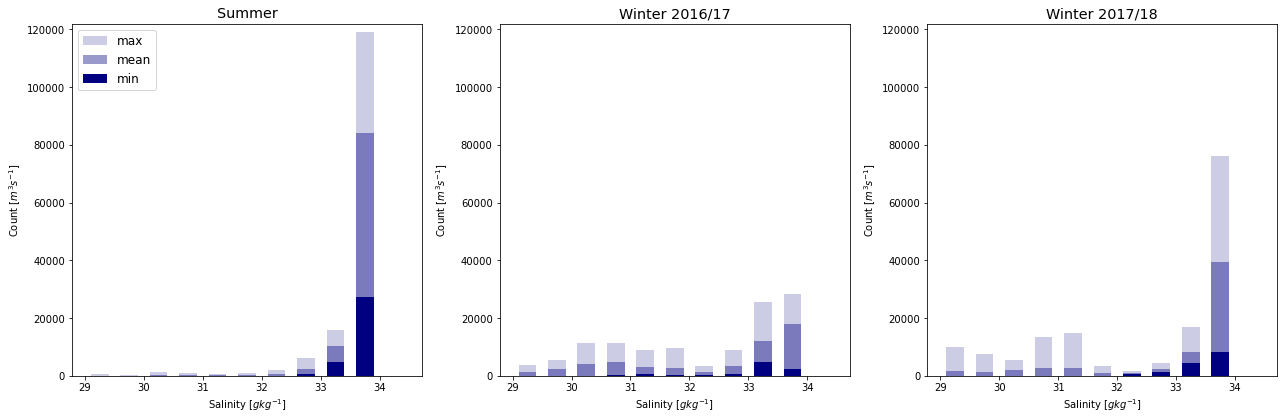

In [37]:
fig, ax = plt.subplots(1, 3, figsize = (18, 6))
plt.rcParams['font.size'] = 12
#plt summer
sum_sal,x,_ = ax[0].hist([Sapr, Smay, Sjun, Sjul, Saug, Ssep], bins=np.arange(29,35,0.5), weights= [Fapr, Fmay, Fjun, Fjul, Faug, Fsep],alpha=0)
bin_centers = 0.5*(x[1:]+x[:-1])

mean = np.mean(sum_sal,axis=0)
mini = np.min(sum_sal,axis=0)
maxi = np.max(sum_sal,axis=0)

ax[0].bar(bin_centers,maxi,width = 0.3,color='navy',alpha=0.2,label='max')
ax[0].bar(bin_centers,mean,width = 0.3, color='navy',alpha=0.4,label='mean')
ax[0].bar(bin_centers, mini,width = 0.3, color='navy',label='min')

ax[0].set_title('Summer')
ax[0].set_ylabel('Count [$m^{3}s^{-1}$]')
ax[0].set_xlabel('Salinity [$g kg^{-1}$]')
ax[0].set_ylim([0,122000])
ax[0].legend()

#plt winter
win_sal,x,_ = ax[1].hist([Soct16, Snov16, Sdec16, Sjan16, Sfeb16, Smar16], bins=np.arange(29,35,0.5), weights= [Foct16, Fnov16, Fdec16, Fjan16, Ffeb16, Fmar16],alpha=0)
bin_centers = 0.5*(x[1:]+x[:-1])

mean = np.mean(win_sal,axis=0)
mini = np.min(win_sal,axis=0)
maxi = np.max(win_sal,axis=0)

ax[1].bar(bin_centers,maxi,width = 0.3,color='navy',alpha=0.2,label='max')
ax[1].bar(bin_centers,mean,width = 0.3, color='navy',alpha=0.4,label='mean')
ax[1].bar(bin_centers, mini,width = 0.3, color='navy',label='min')

ax[1].set_title('Winter 2016/17')
ax[1].set_ylabel('Count [$m^{3}s^{-1}$]')
ax[1].set_xlabel('Salinity [$g kg^{-1}$]')
ax[1].set_ylim([0,122000])

#plt winter
win_sal,x,_ = ax[2].hist([Soct17, Snov17, Sdec17, Sjan17, Sfeb17, Smar17], bins=np.arange(29,35,0.5), weights= [Foct17, Fnov17, Fdec17, Fjan17, Ffeb17, Fmar17],alpha=0)
bin_centers = 0.5*(x[1:]+x[:-1])

mean = np.mean(win_sal,axis=0)
mini = np.min(win_sal,axis=0)
maxi = np.max(win_sal,axis=0)

ax[2].bar(bin_centers,maxi,width = 0.3,color='navy',alpha=0.2,label='max')
ax[2].bar(bin_centers,mean,width = 0.3, color='navy',alpha=0.4,label='mean')
ax[2].bar(bin_centers, mini,width = 0.3, color='navy',label='min')

ax[2].set_title('Winter 2017/18')
ax[2].set_ylabel('Count [$m^{3}s^{-1}$]')
ax[2].set_xlabel('Salinity [$g kg^{-1}$]')
ax[2].set_ylim([0,122000])
# ax[1].legend()

plt.tight_layout()

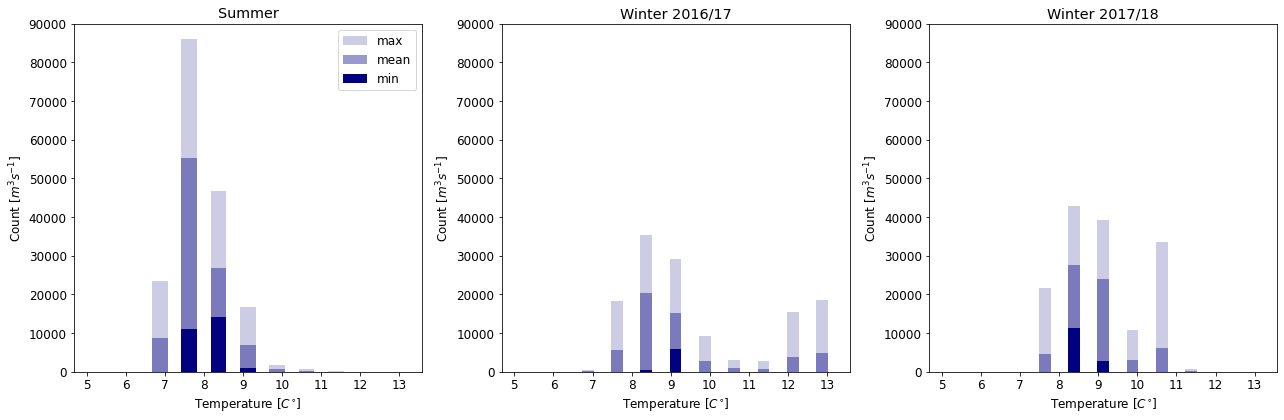

In [38]:
fig, ax = plt.subplots(1, 3, figsize = (18, 6))
plt.rcParams['font.size'] = 12
#plt summer
sum_tem,x,_ = ax[0].hist([Tapr, Tmay, Tjun, Tjul, Taug, Tsep], bins=np.arange(5,14,0.75), weights= [Fapr, Fmay, Fjun, Fjul, Faug, Fsep],alpha=0)
bin_centers = 0.5*(x[1:]+x[:-1])

mean = np.mean(sum_tem,axis=0)
mini = np.min(sum_tem,axis=0)
maxi = np.max(sum_tem,axis=0)

ax[0].bar(bin_centers,maxi,width = 0.4,color='navy',alpha=0.2,label='max')
ax[0].bar(bin_centers,mean,width = 0.4, color='navy',alpha=0.4,label='mean')
ax[0].bar(bin_centers, mini,width = 0.4, color='navy',label='min')

ax[0].set_title('Summer')
ax[0].set_ylabel('Count [$m^{3}s^{-1}$]')
ax[0].set_xlabel('Temperature [$C^{\circ}$]')
ax[0].set_ylim([0,90000])
ax[0].legend()

#plt winter
win_tem,x,_ = ax[1].hist([Toct16, Tnov16, Tdec16, Tjan16, Tfeb16, Tmar16], bins=np.arange(5,14,0.75), weights= [Foct16, Fnov16, Fdec16, Fjan16, Ffeb16, Fmar16],alpha=0)
bin_centers = 0.5*(x[1:]+x[:-1])

mean = np.mean(win_tem,axis=0)
mini = np.min(win_tem,axis=0)
maxi = np.max(win_tem,axis=0)

ax[1].bar(bin_centers,maxi,width = 0.3,color='navy',alpha=0.2,label='max')
ax[1].bar(bin_centers,mean,width = 0.3, color='navy',alpha=0.4,label='mean')
ax[1].bar(bin_centers, mini,width = 0.3, color='navy',label='min')

ax[1].set_title('Winter 2016/17')
ax[1].set_ylabel('Count [$m^{3}s^{-1}$]')
ax[1].set_xlabel('Temperature [$C^{\circ}$]')
ax[1].set_ylim([0,90000])

#plt winter
win_tem,x,_ = ax[2].hist([Toct17, Tnov17, Tdec17, Tjan17, Tfeb17, Tmar17], bins=np.arange(5,14,0.75), weights= [Foct17, Fnov17, Fdec17, Fjan17, Ffeb17, Fmar17],alpha=0)
bin_centers = 0.5*(x[1:]+x[:-1])

mean = np.mean(win_tem,axis=0)
mini = np.min(win_tem,axis=0)
maxi = np.max(win_tem,axis=0)

ax[2].bar(bin_centers,maxi,width = 0.3,color='navy',alpha=0.2,label='max')
ax[2].bar(bin_centers,mean,width = 0.3, color='navy',alpha=0.4,label='mean')
ax[2].bar(bin_centers, mini,width = 0.3, color='navy',label='min')

ax[2].set_title('Winter 2017/18')
ax[2].set_ylabel('Count [$m^{3}s^{-1}$]')
ax[2].set_xlabel('Temperature [$C^{\circ}$]')
ax[2].set_ylim([0,90000])
# ax[1].legend()

plt.tight_layout()

# Cross sections of flow 

In [2]:
mymesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')
depthf = interp.interp1d(mymesh.z, mymesh.gdept_1d)

In [9]:
Sdata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc')
Wdata16 = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar17/ariane_positions_quantitative.nc')
Wdata17 = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar18/ariane_positions_quantitative.nc')

In [3]:
#in the format [section, igridW, igridE, fjgrid, maxdepth] for horizontal CS
# OR for vertical [section, jgridS, jgridN, figrid, maxdepth]
init = [1,259, 274, 640,250] #v
North = [2, 531, 585, 321,180] #h
Sshelf = [5, 634, 644, 200, 180] #h
Sslope = [4, 579, 633, 200, 700] #h
offshore = [3, 199, 300, 560, 3000] # v

In [4]:
def draw_patches(fmask, lonW, lonE, t_dist, t_depths): #draw ground part of cross section
    topo = []
    for i in range(lonW,lonE):
        for j in range(len(t_depths)-1):
            if fmask[j, i] == 0:
                rect = Rectangle((t_dist[i], t_depths[j]), t_dist[i+1]-t_dist[i], t_depths[j+1]-t_depths[j])
                topo.append(rect)
    pc = PatchCollection(topo, facecolors='lightgray', zorder=3)
    return(pc)

In [5]:
def FluxEW(mydata, salfile, tracername, section, lonW, lonE, fjgrid, maxdepth, ax, title):
    igrid = fjgrid-1
    fmask = mymesh.fmask[0, :, igrid, :]
    tmask = mymesh.tmask[0]
    nav_lon = mymesh.nav_lon[igrid]
    time = mydata.init_t[-1]
    
    t_lons = mymesh.glamt[0, igrid]
    m2lon = ((t_lons[lonE]-t_lons[lonW])/(mymesh.e1t[0, igrid, lonW:lonE].sum()))
    t_dist = t_lons/m2lon
    t_depths = mymesh.gdept_1d[0,:]
    
    bins = [np.array(t_dist[lonW-1:lonE+1]), t_depths]
    xs, ys = np.meshgrid(np.array(t_dist), np.array(t_depths))
    
    if type(section) == list:
        lons = mydata.final_lon[np.logical_or(mydata.final_section == section[0],mydata.final_section==section[1])]
        dist = lons/m2lon
        depths = depthf(mydata.final_z[np.logical_or(mydata.final_section == section[0],mydata.final_section==section[1])]-1.)[0]
        transports = mydata.final_transp[np.logical_or(mydata.final_section == section[0],mydata.final_section==section[1])]/time
        
        H1, _, _ = np.histogram2d(dist, depths, bins=[np.array(t_dist[lonW-1:lonE+1]), t_depths],weights= transports, density= True)
        _, xedges, yedges = np.histogram2d(dist, depths, bins = bins)
    
        if tracername == 'trans':
            t_max = (0.01/np.sum(transports)).values
            tick = np.round(((t_max*sum(transports)).values),2)
            cmap = cm.speed
            units = '$m s^{-1}$'
            
            H_final = H1.T
    
        elif tracername == 'temp' or tracername == 'salt':
            if tracername == 'temp':
                tracer = mydata.init_temp[np.logical_or(mydata.final_section == section[0],mydata.final_section==section[1])]
                t_max = round(1 * 0.1,1)
                tick = t_max
                cmap = cm.rain
                units = '$C^{\circ} m s^{-1}$'
            else:
                tracer = mydata.init_salt[np.logical_or(mydata.final_section == section[0],mydata.final_section==section[1])]
                t_max = round(15 * 0.1,1)
                tick = t_max
                cmap = cm.amp
                units = '$g kg^{-1} m s^{-1}$'
        
            H = binned_statistic_2d(dist, depths, tracer, statistic=np.mean, bins=[np.array(t_dist[lonW-1:lonE+1]), t_depths])
            H_final = H1.T * H.statistic.T * float(sum(transports))
    
        else:
            print('incorrect tracer name, options are trans, salt, temp')
            
    else:
        lons = mydata.final_lon[(mydata.final_section==section)]
        dist = lons/m2lon
        depths = depthf(mydata.final_z[(mydata.final_section==section)]-1.)[0]
        transports = mydata.final_transp[(mydata.final_section==section)]/time
        
        H1, _, _ = np.histogram2d(dist, depths, bins=[np.array(t_dist[lonW-1:lonE+1]), t_depths],weights= transports, density= True)
        _, xedges, yedges = np.histogram2d(dist, depths, bins = bins)
    
        if tracername == 'trans':
            t_max = (0.01/np.sum(transports)).values
            tick = np.round(((t_max*sum(transports)).values),2)
            cmap = cm.speed
            units = '$m s^{-1}$'
            
            H_final = H1.T
    
        elif tracername == 'temp' or tracername == 'salt':
            if tracername == 'temp':
                tracer = mydata.init_temp[(mydata.final_section == section)]
                t_max = round(1 * 0.1,1)
                tick = t_max
                cmap = cm.rain
                units = '$C^{\circ} m s^{-1}$'
            else:
                tracer = mydata.init_salt[(mydata.final_section == section)]
                t_max = round(15 * 0.1,1)
                tick = t_max
                cmap = cm.amp
                units = '$g kg^{-1} m s^{-1}$'
        
            H = binned_statistic_2d(dist, depths, tracer, statistic=np.mean, bins=[np.array(t_dist[lonW-1:lonE+1]), t_depths])
            H_final = H1.T * H.statistic.T * float(sum(transports))
    
        else:
            print('incorrect tracer name, options are trans, salt, temp')

    H_final = np.where(H_final>0, H_final, H_final*np.nan)

    X, Y = np.meshgrid(xedges, yedges)
    cmap.set_bad('white')
    im = ax.pcolormesh(X, Y, H_final, vmax = t_max, vmin = 0, cmap=cmap)
    cb1 = fig.colorbar(im, ax=ax)
    cb1.set_ticks([0, t_max])
    cb1.set_ticklabels([0, tick]) 
    cb1.set_label(units, labelpad=-20)
    
#     salinity = 0.5*(np.ma.array(salfile.vosaline[0, :, igrid],
#             mask=1-tmask[:, igrid]) +
#             np.ma.array(salfile.vosaline[0, :, igrid+1],
#             mask=1-tmask[:, igrid+1]))
#     CS = ax.contour(xs, ys, salinity,  np.arange(29,34.5, 0.5), colors='b', zorder = 2)
#     ax.clabel(CS, inline=1, fontsize=7)
    
    pc = draw_patches(fmask, lonW-2, lonE, np.array(t_dist), np.array(t_depths))
    ax.add_collection(pc)

    ax.invert_yaxis()
    ax.set_xticks(np.linspace(t_dist[lonW], t_dist[lonE], 5))
    ax.set_xticklabels(np.round(np.linspace(t_lons[lonW], t_lons[lonE], 5),2))
    ax.set_xlim((t_dist[lonW], t_dist[lonE-1]))
    ax.set_ylim((maxdepth, 0))
    ax.set_title(str(title))
    ax.set_ylabel('Depth [m]')
    mydata.close()
    
    return t_dist

In [6]:
def FluxNS(mydata, salfile, tracername, section, latS, latN, figrid, maxdepth, ax, title):
    igrid = figrid-1
    fmask = mymesh.fmask[0, :, :, igrid]
    tmask = mymesh.tmask[0]
    nav_lat = mymesh.nav_lat[igrid]
    time = mydata.init_t[-1]
    
    t_lat = mymesh.gphit[0,:,igrid]
    m2lat = ((t_lat[latN]-t_lat[latS])/(mymesh.e2t[0, latS:latN, igrid].sum()))
    t_dist = t_lat/m2lat
    t_depths = mymesh.gdept_1d[0,:]
    
    xs, ys = np.meshgrid(np.array(t_dist), np.array(t_depths))
    
    lats = mydata.final_lat[(mydata.final_section==section)]
    dist = lats/m2lat
    depths = depthf(mydata.final_z[(mydata.final_section==section)]-1.)[0]
    transports = mydata.final_transp[(mydata.final_section==section)]/time
    
    bins = [np.array(t_dist[latS-1:latN+1]), t_depths]
    H1, _, _ = np.histogram2d(dist, depths, bins=[np.array(t_dist[latS-1:latN+1]), t_depths],weights= transports, density= True)
    _, xedges, yedges = np.histogram2d(dist, depths, bins = bins)
    
    if tracername == 'trans':
        t_max = (0.01/np.sum(transports)).values
        tick = np.round(((t_max*sum(transports)).values),2)
        cmap = cm.speed
        units = '$m s^{-1}$'
        
        H_final = H1.T
    
    elif tracername == 'temp' or tracername == 'salt':
        if tracername == 'temp':
            tracer = mydata.init_temp[(mydata.final_section == section)]
            t_max = round(1 * 0.1,1)
            tick = t_max
            cmap = cm.rain
            units = '$C^{\circ} m s^{-1}$'
        else:
            tracer = mydata.init_salt[(mydata.final_section == section)]
            t_max = round(15 * 0.1,1)
            tick = t_max
            cmap = cm.amp
            units = '$g kg^{-1} m s^{-1}$'
        
        H = binned_statistic_2d(dist, depths, tracer, statistic=np.mean, bins=[np.array(t_dist[latS-1:latN+1]), t_depths])
        H_final = H1.T * H.statistic.T * float(sum(transports))
    
    else:
        print('incorrect tracer name, options are trans, salt, temp')
    
    H_final = np.where(H_final>0, H_final, H_final*np.nan)

    X, Y = np.meshgrid(xedges, yedges)
    im = ax.pcolormesh(X, Y, H_final, vmax = t_max, cmap=cmap)
    cb1 = fig.colorbar(im, ax=ax)
    cb1.set_ticks([0, t_max])
    cb1.set_ticklabels([0, tick])
    cb1.set_label(units, labelpad=-20)
    
#     salinity = 0.5*(np.ma.array(salfile.vosaline[0, :, :, igrid],
#         mask=1-tmask[:, :, igrid]) +
#         np.ma.array(salfile.vosaline[0, :, :, igrid+1],
#         mask=1-tmask[:, :, igrid+1]))
#     CS = ax.contour(xs, ys, salinity,  np.arange(29,34.5, 0.5), colors='b', zorder = 2)
#     ax.clabel(CS, inline=1, fontsize=7)
    
    pc = draw_patches(fmask, latS-2, latN, np.array(t_dist), np.array(t_depths))
    ax.add_collection(pc)

    ax.invert_yaxis()
    ax.set_xticks(np.linspace(t_dist[latS], t_dist[latN], 2))
    ax.set_xticklabels(np.round(np.linspace(t_lat[latS], t_lat[latN], 2),2))
    ax.set_xlim((t_dist[latS], t_dist[latN]))
    ax.set_ylim((maxdepth, 0))
    ax.set_title(str(title))
    ax.set_ylabel('Depth [m]')
    mydata.close()

In [7]:
salfileS17 = xr.open_dataset('/ocean/rbeutel/data/201707/S_new_20170701.nc')
salfileW16 = xr.open_dataset('/ocean/rbeutel/data/201701/S_new_20170101.nc')
salfileW17 = xr.open_dataset('/ocean/rbeutel/data/201801/S_new_20180101.nc')

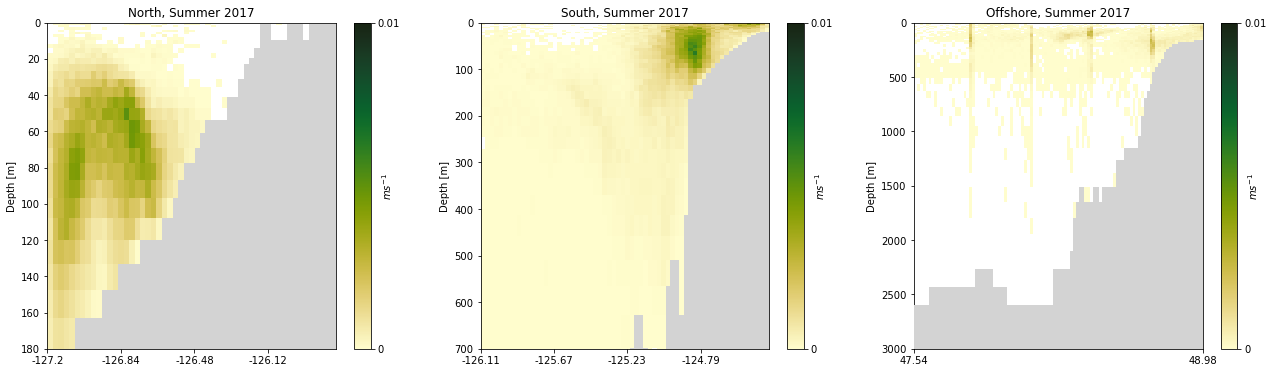

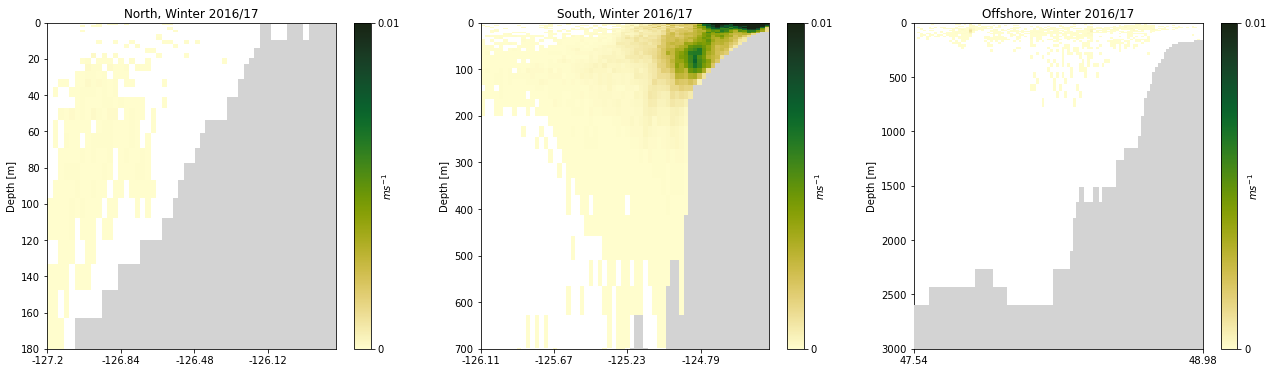

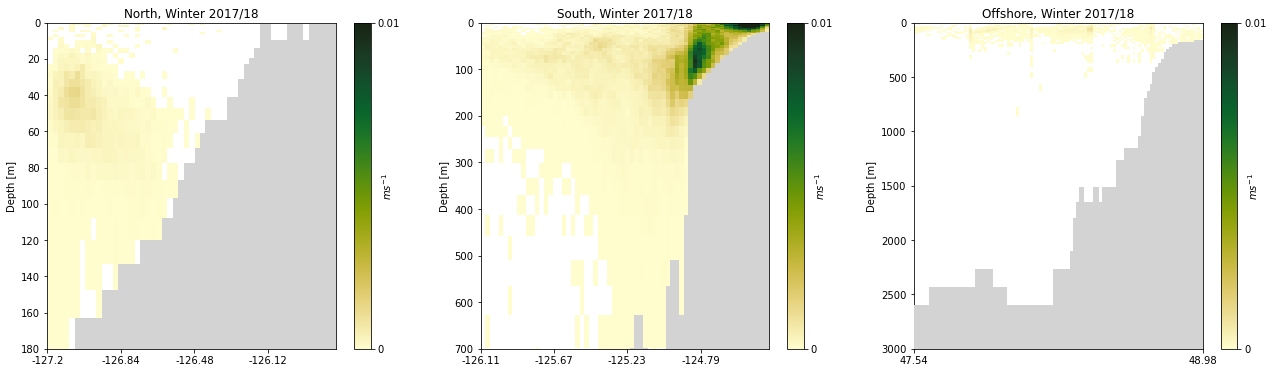

In [11]:
# one presentable figure with all the offshore stuff for the three seasons togetha
fig, ax = plt.subplots(1,3, figsize=[22,6])
t_dist = FluxEW(Sdata, salfileS17, 'trans', North[0], North[1], North[2], North[3], North[4], ax[0], 'North, Summer 2017')
t_dist = FluxEW(Sdata, salfileS17, 'trans', [Sslope[0], Sshelf[0]], Sslope[1], Sshelf[2], Sslope[3], Sslope[4], ax[1], 'South, Summer 2017')
FluxNS(Sdata, salfileS17, 'trans', offshore[0], offshore[1], offshore[2], offshore[3], offshore[4], ax[2], 'Offshore, Summer 2017')


fig, ax = plt.subplots(1,3, figsize=[22,6])
t_dist = FluxEW(Wdata16, salfileW16, 'trans', North[0], North[1], North[2], North[3], North[4], ax[0], 'North, Winter 2016/17')
t_dist = FluxEW(Wdata16, salfileW16, 'trans', [Sslope[0], Sshelf[0]], Sslope[1], Sshelf[2], Sslope[3], Sslope[4], ax[1], 'South, Winter 2016/17')
FluxNS(Wdata16, salfileW16, 'trans', offshore[0], offshore[1], offshore[2], offshore[3], offshore[4], ax[2], 'Offshore, Winter 2016/17')

fig, ax = plt.subplots(1,3, figsize=[22,6])
t_dist = FluxEW(Wdata17, salfileW17, 'trans', North[0], North[1], North[2], North[3], North[4], ax[0], 'North, Winter 2017/18')
t_dist = FluxEW(Wdata17, salfileW17, 'trans', [Sslope[0], Sshelf[0]], Sslope[1], Sshelf[2], Sslope[3], Sslope[4], ax[1], 'South, Winter 2017/18')
FluxNS(Wdata17, salfileW17, 'trans', offshore[0], offshore[1], offshore[2], offshore[3], offshore[4], ax[2], 'Offshore, Winter 2017/18')

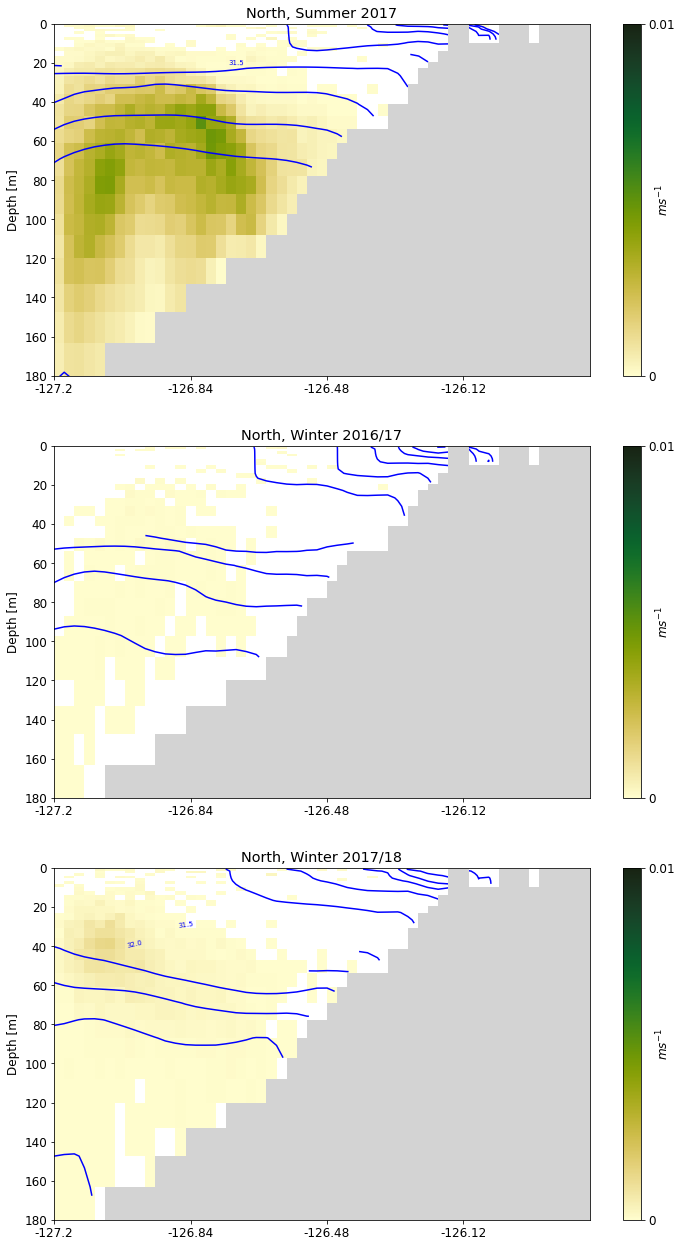

In [44]:
fig, ax = plt.subplots(3,1, figsize=[12,22])
t_dist = FluxEW(Sdata, salfileS17, 'trans', North[0], North[1], North[2], North[3], North[4], ax[0], 'North, Summer 2017')
t_dist = FluxEW(Wdata16, salfileW16, 'trans', North[0], North[1], North[2], North[3], North[4], ax[1], 'North, Winter 2016/17')
t_dist = FluxEW(Wdata17, salfileW17, 'trans', North[0], North[1], North[2], North[3], North[4], ax[2], 'North, Winter 2017/18')

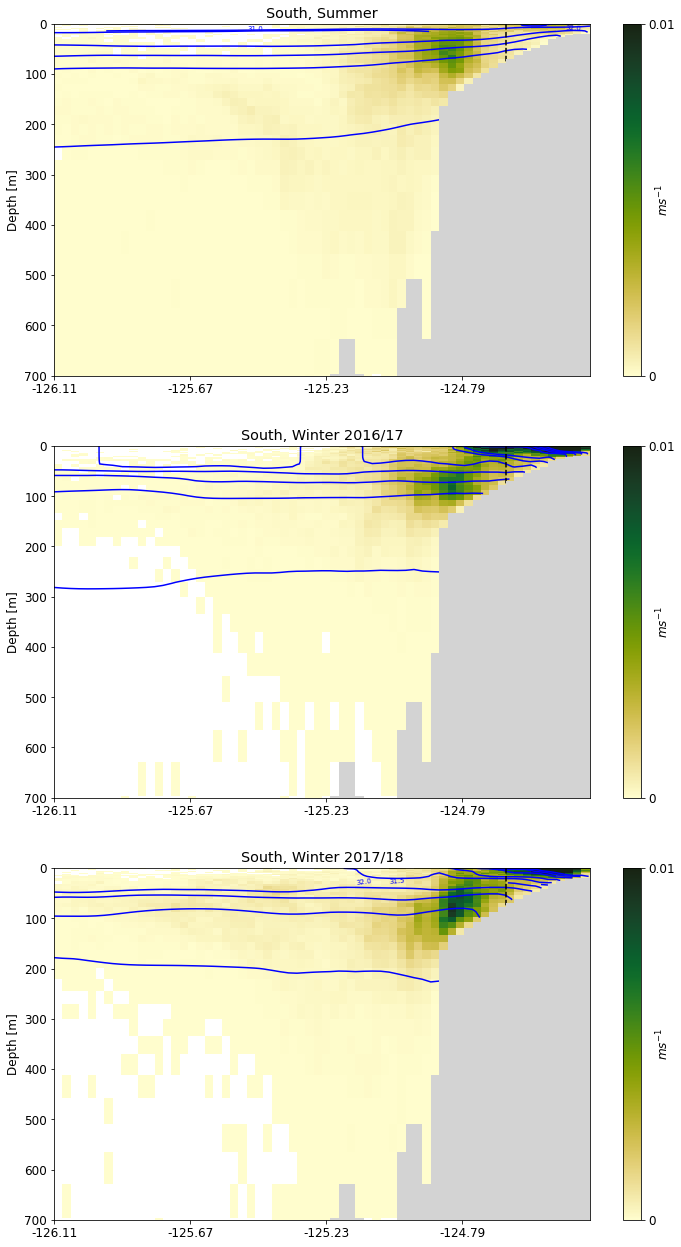

In [45]:
fig, ax = plt.subplots(3,1, figsize=[12,22])
t_dist = FluxEW(Sdata, salfileS17, 'trans', [Sslope[0], Sshelf[0]], Sslope[1], Sshelf[2], Sslope[3], Sslope[4], ax[0], 'South, Summer')
ax[0].plot([t_dist[633],t_dist[633]], [0,500], 'k--', zorder=2)

t_dist = FluxEW(Wdata16, salfileW16, 'trans', [Sslope[0], Sshelf[0]], Sslope[1], Sshelf[2], Sslope[3], Sslope[4], ax[1], 'South, Winter 2016/17')
ax[1].plot([t_dist[633],t_dist[633]], [0,500], 'k--', zorder=2)

t_dist = FluxEW(Wdata17, salfileW17, 'trans', [Sslope[0], Sshelf[0]], Sslope[1], Sshelf[2], Sslope[3], Sslope[4], ax[2], 'South, Winter 2017/18')
ax[2].plot([t_dist[633],t_dist[633]], [0,500], 'k--', zorder=2)

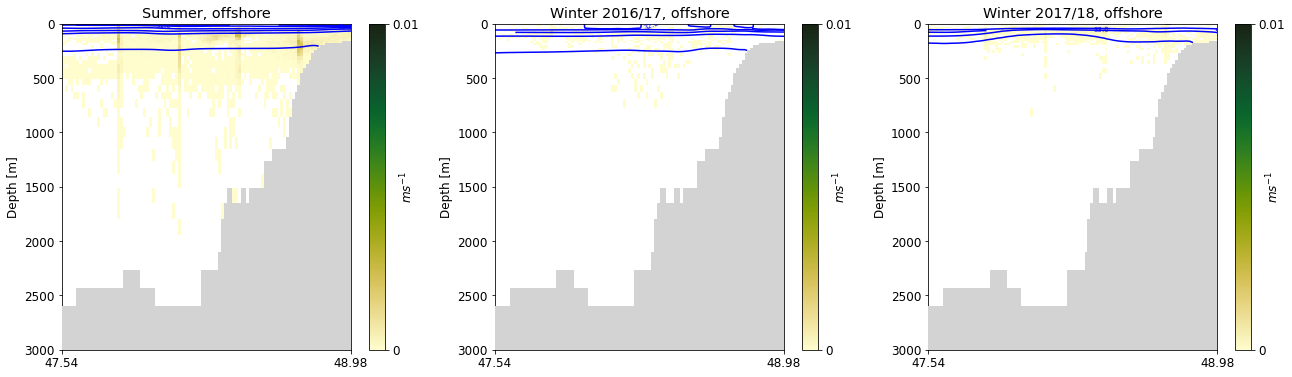

In [46]:
fig, ax = plt.subplots(1,3, figsize=[22,6])
FluxNS(Sdata, salfileS17, 'trans', offshore[0], offshore[1], offshore[2], offshore[3], offshore[4], ax[0], 'Summer, offshore')
FluxNS(Wdata16, salfileW16, 'trans', offshore[0], offshore[1], offshore[2], offshore[3], offshore[4], ax[1], 'Winter 2016/17, offshore')
FluxNS(Wdata17, salfileW17, 'trans', offshore[0], offshore[1], offshore[2], offshore[3], offshore[4], ax[2], 'Winter 2017/18, offshore')

In [47]:
def JRFluxNS(mydata, salfile, tracername,latS, latN, figrid, maxdepth, ax, title):
    igrid = figrid-1
    fmask = mymesh.fmask[0, :, :, igrid]
    tmask = mymesh.tmask[0]
    nav_lat = mymesh.nav_lat[igrid]
    time = mydata.init_t[-1]
    
    t_lat = mymesh.gphit[0,:,igrid]
    m2lat = ((t_lat[latN]-t_lat[latS])/(mymesh.e2t[0, latS:latN, igrid].sum()))
    t_dist = t_lat/m2lat
    t_depths = mymesh.gdept_1d[0,:]
    
    xs, ys = np.meshgrid(np.array(t_dist), np.array(t_depths))
    
    lats = mydata.init_lat[(mydata.final_section != 0)]
    dist = lats/m2lat
    depths = depthf(mydata.init_z[(mydata.final_section != 0)]-1.)[0]
    transports = mydata.init_transp[(mydata.final_section != 0)]/time
    
    bins = [np.array(t_dist[latS-1:latN+1]), t_depths]
    H1, _, _ = np.histogram2d(dist, depths, bins=[np.array(t_dist[latS-1:latN+1]), t_depths],weights= transports, density= True)
    _, xedges, yedges = np.histogram2d(dist, depths, bins = bins)
    
    if tracername == 'trans':
        t_max = (0.05/np.sum(transports)).values
        tick = np.round(((t_max*sum(transports)).values),2)
        cmap = cm.speed
        units = '$m s^{-1}$'
        
        H_final = H1.T
    
    elif tracername == 'temp' or tracername == 'salt':
        if tracername == 'temp':
            tracer = mydata.init_temp[(mydata.final_section != 0)]
            t_max = round(1 * 0.1,1)
            tick = t_max
            cmap = cm.rain
            units = '$C^{\circ} m s^{-1}$'
        else:
            tracer = mydata.init_salt[(mydata.final_section != 0)]
            t_max = round(15 * 0.1,1)
            tick = t_max
            cmap = cm.amp
            units = '$g kg^{-1} m s^{-1}$'
        
        H = binned_statistic_2d(dist, depths, tracer, statistic=np.mean, bins=[np.array(t_dist[latS-1:latN+1]), t_depths])
        H_final = H1.T * H.statistic.T * float(sum(transports))
    
    else:
        print('incorrect tracer name, options are trans, salt, temp')
    
    H_final = np.where(H_final>0, H_final, H_final*np.nan)

    X, Y = np.meshgrid(xedges, yedges)
    im = ax.pcolormesh(X, Y, H_final, vmax = t_max, cmap=cmap)
    cb1 = fig.colorbar(im, ax=ax)
    cb1.set_ticks([0, t_max])
    cb1.set_ticklabels([0, tick])
    cb1.set_label(units, labelpad=-20)
    
    salinity = 0.5*(np.ma.array(salfile.vosaline[0, :, :, igrid],
        mask=1-tmask[:, :, igrid]) +
        np.ma.array(salfile.vosaline[0, :, :, igrid+1],
        mask=1-tmask[:, :, igrid+1]))
    CS = ax.contour(xs, ys, salinity,  np.arange(29,34.5, 0.5), colors='b', zorder = 2)
    ax.clabel(CS, inline=1, fontsize=7)
    
    pc = draw_patches(fmask, latS-2, latN, np.array(t_dist), np.array(t_depths))
    ax.add_collection(pc)

    ax.invert_yaxis()
    ax.set_xticks(np.linspace(t_dist[latS], t_dist[latN], 2))
    ax.set_xticklabels(np.round(np.linspace(t_lat[latS], t_lat[latN], 2),2))
    ax.set_xlim((t_dist[latS], t_dist[latN]))
    ax.set_ylim((maxdepth, 0))
    ax.set_title(str(title))
    ax.set_ylabel('Depth [m]')
    mydata.close()

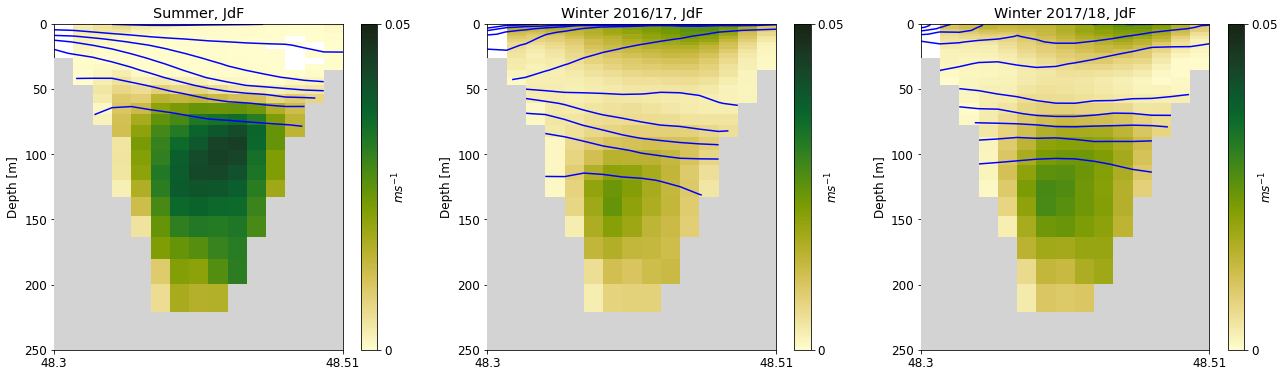

In [48]:
fig, ax = plt.subplots(1,3, figsize=[22,6])
JRFluxNS(Sdata, salfileS17, 'trans', init[1], init[2], init[3], init[4], ax[0], 'Summer, JdF')
JRFluxNS(Wdata16, salfileW16, 'trans', init[1], init[2], init[3], init[4], ax[1], 'Winter 2016/17, JdF')
JRFluxNS(Wdata17, salfileW17, 'trans', init[1], init[2], init[3], init[4], ax[2], 'Winter 2017/18, JdF')

## does our seperation of temperature and salinity of the water going in tell us anything about where the water came from?

In [27]:
def FluxSpecificEW(lonW, lonE, figrid, maxdepth, ax, lons, trans, depth, high):
    igrid = figrid-1
    fmask = mymesh.fmask[0, :, igrid, :]
    tmask = mymesh.tmask[0]
    nav_lon = mymesh.nav_lon[igrid]
    time = mydata.init_t[-1]
    
    t_lons = mymesh.glamt[0, igrid]
    m2lon = ((t_lons[lonE]-t_lons[lonW])/(mymesh.e1t[0, igrid, lonW:lonE].sum()))
    t_dist = t_lons/m2lon
    t_depths = mymesh.gdept_1d[0,:]
    
    bins = [np.array(t_dist[lonW-1:lonE+1]), t_depths]
    xs, ys = np.meshgrid(np.array(t_dist), np.array(t_depths))
    
    t_max = (high/np.sum(trans)).values

    dist = lons/m2lon
        
    H1, _, _ = np.histogram2d(dist, depth, bins=[np.array(t_dist[lonW-1:lonE+1]), t_depths],weights= trans, density= True)
    _, xedges, yedges = np.histogram2d(dist, depth, bins = bins)
            
    H_final = H1.T
    H_final = np.where(H_final>0, H_final, H_final*np.nan)

    X, Y = np.meshgrid(xedges, yedges)
    cmap = cm.speed
    cmap.set_bad('white')
    im = ax.pcolormesh(X, Y, H_final, vmax = t_max, vmin = 0, cmap=cmap)
    cb1 = fig.colorbar(im, ax=ax)
    tick = np.round(((t_max*np.sum(trans)).values),2)
    cb1.set_ticks([0, t_max])
    cb1.set_ticklabels([0, tick]) 
    cb1.set_label('m/s', labelpad=-20)
    
    pc = draw_patches(fmask, lonW-2, lonE, np.array(t_dist), np.array(t_depths))
    ax.add_collection(pc)

    ax.invert_yaxis()
    ax.set_xticks(np.linspace(t_dist[lonW], t_dist[lonE], 5))
    ax.set_xticklabels(np.round(np.linspace(t_lons[lonW], t_lons[lonE], 5),2))
    ax.set_xlim((t_dist[lonW], t_dist[lonE-1]))
    ax.set_ylim((maxdepth, 0))
    # ax.set_title(str(title))
    ax.set_ylabel('Depth [m]')
    mydata.close()

In [28]:
def FluxSpecificNS(latS, latN, fjgrid, maxdepth, ax, lats, trans, depth, high):
    jgrid = fjgrid-1
    fmask = mymesh.fmask[0, :, : ,jgrid]
    tmask = mymesh.tmask[0]
    nav_lat = mymesh.nav_lat[jgrid]
    time = mydata.init_t[-1]
    
    t_lats = mymesh.gphit[0, :, jgrid]
    m2lat = ((t_lats[latN]-t_lats[latS])/(mymesh.e2t[0, latS:latN, jgrid].sum()))
    t_dist = t_lats/m2lat
    t_depths = mymesh.gdept_1d[0,:]
    
    bins = [np.array(t_dist[latS-1:latN+1]), t_depths]
    xs, ys = np.meshgrid(np.array(t_dist), np.array(t_depths))
    
    t_max = (high/np.sum(trans)).values

    dist = lats/m2lat
        
    H1, _, _ = np.histogram2d(dist, depth, bins=bins,weights= trans, density= True)
    _, xedges, yedges = np.histogram2d(dist, depth, bins = bins)
            
    H_final = H1.T
    H_final = np.where(H_final>0, H_final, H_final*np.nan)

    X, Y = np.meshgrid(xedges, yedges)
    cmap = cm.speed
    cmap.set_bad('white')
    im = ax.pcolormesh(X, Y, H_final, vmax = t_max, cmap=cmap)
    cb1 = fig.colorbar(im, ax=ax)
    tick = np.round(((t_max*np.sum(trans)).values),2)
    cb1.set_ticks([0, t_max])
    cb1.set_ticklabels([0, tick]) 
    cb1.set_label('m/s', labelpad=-20)
    
    pc = draw_patches(fmask, latS-2, latN, np.array(t_dist), np.array(t_depths))
    ax.add_collection(pc)

    ax.invert_yaxis()
    ax.set_xticks(np.linspace(t_dist[latS], t_dist[latN], 5))
    ax.set_xticklabels(np.round(np.linspace(t_lats[latS], t_lats[latN], 5),2))
    ax.set_xlim((t_dist[latS], t_dist[latN-1]))
    ax.set_ylim((maxdepth, 0))
    # ax.set_title(str(title))
    ax.set_ylabel('Depth [m]')
    mydata.close()

### deep - salty salty

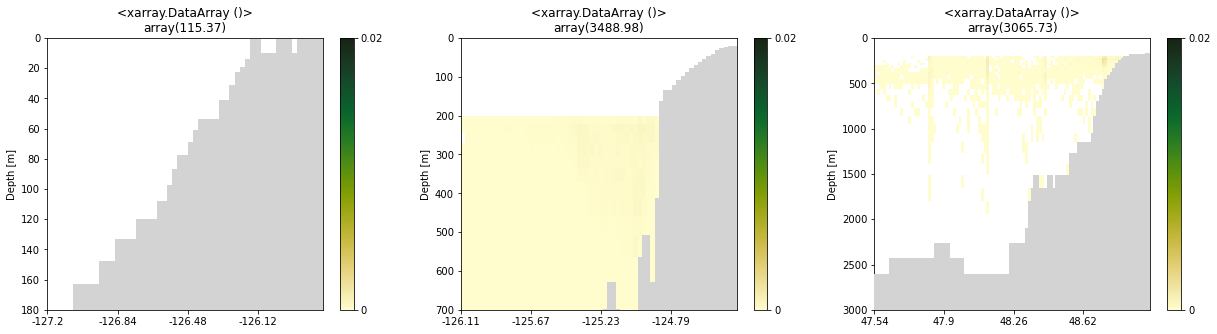

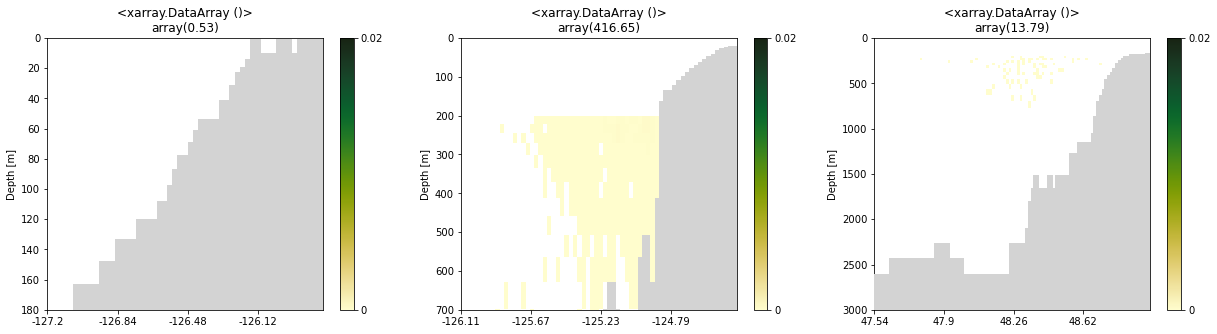

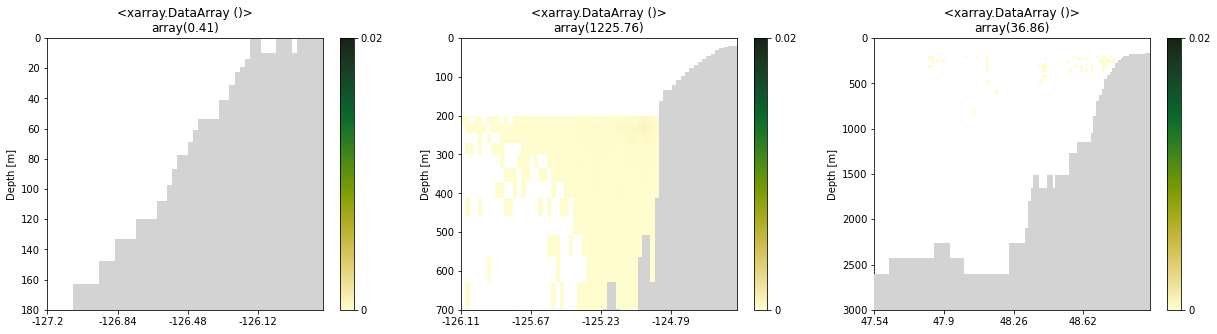

In [120]:
#summer 2017
# high = 0.02
fig, ax = plt.subplots(1,3,figsize=(21,5))

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc')
time = mydata.init_t[-1]

lons = mydata.final_lon[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & (mydata.final_section == 2)]
depth = depthf(mydata.final_z[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & (mydata.final_section == 2)]-1.)[0]
trans = mydata.final_transp[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & (mydata.final_section == 2)]/time
title = np.round(np.sum(trans),2)
ax[0].set_title(title)
FluxSpecificEW(North[1], North[2], North[3], North[4], ax[0], lons, trans, depth, high)

lons = mydata.final_lon[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]
depth = depthf(mydata.final_z[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]-1.)[0]
trans = mydata.final_transp[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]/time
title = np.round(np.sum(trans),2)
ax[1].set_title(title)
FluxSpecificEW(Sslope[1], Sshelf[2], Sshelf[3], Sslope[4], ax[1], lons, trans, depth, high)

lats = mydata.final_lat[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & (mydata.final_section == 3)]
depth = depthf(mydata.final_z[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & (mydata.final_section == 3)]-1.)[0]
trans = mydata.final_transp[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & (mydata.final_section == 3)]/time
title = np.round(np.sum(trans),2)
ax[2].set_title(title)
FluxSpecificNS(offshore[1], offshore[2], offshore[3], offshore[4], ax[2], lats, trans, depth, high)


#winter 2016/17
fig, ax = plt.subplots(1,3,figsize=(21,5))

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar17/ariane_positions_quantitative.nc')
time = mydata.init_t[-1]

lons = mydata.final_lon[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & (mydata.final_section == 2)]
depth = depthf(mydata.final_z[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & (mydata.final_section == 2)]-1.)[0]
trans = mydata.final_transp[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & (mydata.final_section == 2)]/time
title = np.round(np.sum(trans),2)
ax[0].set_title(title)
FluxSpecificEW(North[1], North[2], North[3], North[4], ax[0], lons, trans, depth, high)

lons = mydata.final_lon[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]
depth = depthf(mydata.final_z[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]-1.)[0]
trans = mydata.final_transp[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]/time
title = np.round(np.sum(trans),2)
ax[1].set_title(title)
FluxSpecificEW(Sslope[1], Sshelf[2], Sshelf[3], Sslope[4], ax[1], lons, trans, depth, high)

lats = mydata.final_lat[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & (mydata.final_section == 3)]
depth = depthf(mydata.final_z[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & (mydata.final_section == 3)]-1.)[0]
trans = mydata.final_transp[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & (mydata.final_section == 3)]/time
title = np.round(np.sum(trans),2)
ax[2].set_title(title)
FluxSpecificNS(offshore[1], offshore[2], offshore[3], offshore[4], ax[2], lats, trans, depth, high)

#winter 2017/18
fig, ax = plt.subplots(1,3,figsize=(21,5))

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar18/ariane_positions_quantitative.nc')
time = mydata.init_t[-1]

lons = mydata.final_lon[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & (mydata.final_section == 2)]
depth = depthf(mydata.final_z[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & (mydata.final_section == 2)]-1.)[0]
trans = mydata.final_transp[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & (mydata.final_section == 2)]/time
title = np.round(np.sum(trans),2)
ax[0].set_title(title)
FluxSpecificEW(North[1], North[2], North[3], North[4], ax[0], lons, trans, depth, high)

lons = mydata.final_lon[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]
depth = depthf(mydata.final_z[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]-1.)[0]
trans = mydata.final_transp[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]/time
title = np.round(np.sum(trans),2)
ax[1].set_title(title)
FluxSpecificEW(Sslope[1], Sshelf[2], Sshelf[3], Sslope[4], ax[1], lons, trans, depth, high)

lats = mydata.final_lat[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & (mydata.final_section == 3)]
depth = depthf(mydata.final_z[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & (mydata.final_section == 3)]-1.)[0]
trans = mydata.final_transp[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200) & (mydata.final_section == 3)]/time
title = np.round(np.sum(trans),2)
ax[2].set_title(title)
FluxSpecificNS(offshore[1], offshore[2], offshore[3], offshore[4], ax[2], lats, trans, depth, high)

### shallow - salty salty

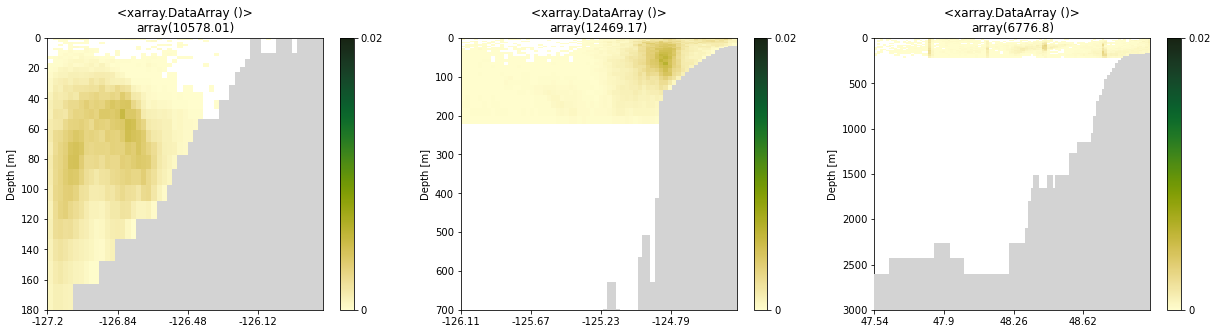

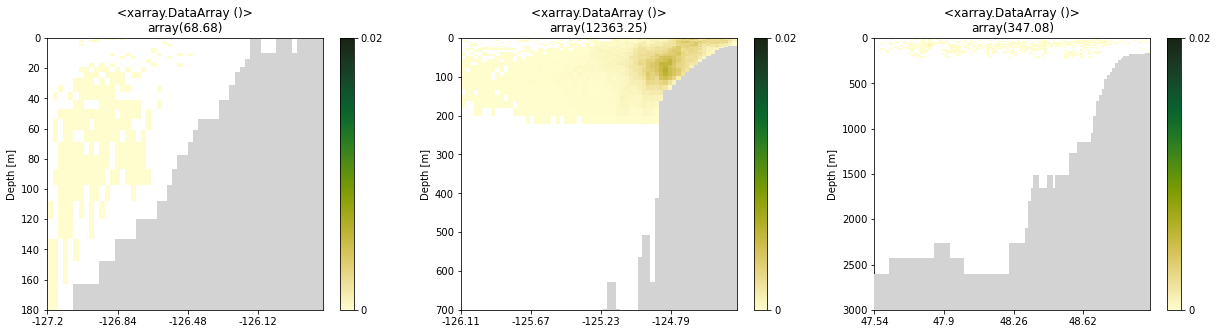

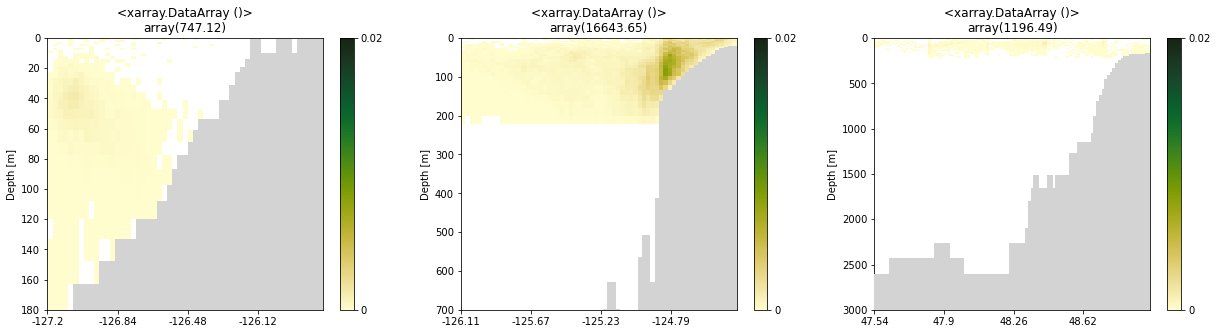

In [78]:
#summer 2017
fig, ax = plt.subplots(1,3,figsize=(21,5))

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc')
time = mydata.init_t[-1]

lons = mydata.final_lon[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & (mydata.final_section == 2)]
depth = depthf(mydata.final_z[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & (mydata.final_section == 2)]-1.)[0]
trans = mydata.final_transp[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & (mydata.final_section == 2)]/time
title = np.round(np.sum(trans),2)
ax[0].set_title(title)
FluxSpecificEW(North[1], North[2], North[3], North[4], ax[0], lons, trans, depth, 0.02)

lons = mydata.final_lon[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]
depth = depthf(mydata.final_z[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]-1.)[0]
trans = mydata.final_transp[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]/time
title = np.round(np.sum(trans),2)
ax[1].set_title(title)
FluxSpecificEW(Sslope[1], Sshelf[2], Sshelf[3], Sslope[4], ax[1], lons, trans, depth, 0.02)

lats = mydata.final_lat[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & (mydata.final_section == 3)]
depth = depthf(mydata.final_z[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & (mydata.final_section == 3)]-1.)[0]
trans = mydata.final_transp[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & (mydata.final_section == 3)]/time
title = np.round(np.sum(trans),2)
ax[2].set_title(title)
FluxSpecificNS(offshore[1], offshore[2], offshore[3], offshore[4], ax[2], lats, trans, depth, 0.02)


#winter 2016/17
fig, ax = plt.subplots(1,3,figsize=(21,5))

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar17/ariane_positions_quantitative.nc')
time = mydata.init_t[-1]

lons = mydata.final_lon[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & (mydata.final_section == 2)]
depth = depthf(mydata.final_z[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & (mydata.final_section == 2)]-1.)[0]
trans = mydata.final_transp[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & (mydata.final_section == 2)]/time
title = np.round(np.sum(trans),2)
ax[0].set_title(title)
FluxSpecificEW(North[1], North[2], North[3], North[4], ax[0], lons, trans, depth, 0.02)

lons = mydata.final_lon[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]
depth = depthf(mydata.final_z[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]-1.)[0]
trans = mydata.final_transp[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]/time
title = np.round(np.sum(trans),2)
ax[1].set_title(title)
FluxSpecificEW(Sslope[1], Sshelf[2], Sshelf[3], Sslope[4], ax[1], lons, trans, depth, 0.02)

lats = mydata.final_lat[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & (mydata.final_section == 3)]
depth = depthf(mydata.final_z[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & (mydata.final_section == 3)]-1.)[0]
trans = mydata.final_transp[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & (mydata.final_section == 3)]/time
title = np.round(np.sum(trans),2)
ax[2].set_title(title)
FluxSpecificNS(offshore[1], offshore[2], offshore[3], offshore[4], ax[2], lats, trans, depth, 0.02)

#winter 2017/18
fig, ax = plt.subplots(1,3,figsize=(21,5))

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar18/ariane_positions_quantitative.nc')
time = mydata.init_t[-1]

lons = mydata.final_lon[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & (mydata.final_section == 2)]
depth = depthf(mydata.final_z[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & (mydata.final_section == 2)]-1.)[0]
trans = mydata.final_transp[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & (mydata.final_section == 2)]/time
title = np.round(np.sum(trans),2)
ax[0].set_title(title)
FluxSpecificEW(North[1], North[2], North[3], North[4], ax[0], lons, trans, depth, 0.02)

lons = mydata.final_lon[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]
depth = depthf(mydata.final_z[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]-1.)[0]
trans = mydata.final_transp[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]/time
title = np.round(np.sum(trans),2)
ax[1].set_title(title)
FluxSpecificEW(Sslope[1], Sshelf[2], Sshelf[3], Sslope[4], ax[1], lons, trans, depth, 0.02)

lats = mydata.final_lat[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & (mydata.final_section == 3)]
depth = depthf(mydata.final_z[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & (mydata.final_section == 3)]-1.)[0]
trans = mydata.final_transp[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & (mydata.final_section == 3)]/time
title = np.round(np.sum(trans),2)
ax[2].set_title(title)
FluxSpecificNS(offshore[1], offshore[2], offshore[3], offshore[4], ax[2], lats, trans, depth, 0.02)

### fresh - summer only

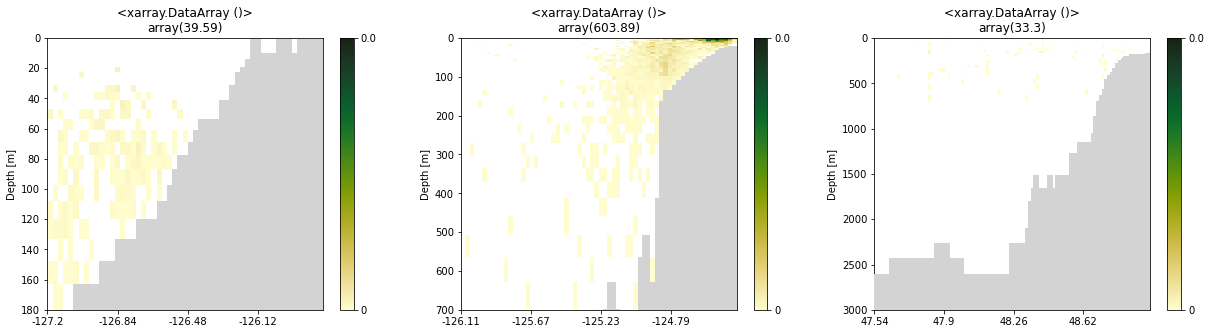

In [7]:
#summer 2017
fig, ax = plt.subplots(1,3,figsize=(21,5))

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc')
time = mydata.init_t[-1]

lons = mydata.final_lon[(mydata.init_salt <= 32.4) & (mydata.final_section == 2)]
depth = depthf(mydata.final_z[(mydata.init_salt <= 32.4) & (mydata.final_section == 2)]-1.)[0]
trans = mydata.final_transp[(mydata.init_salt <= 32.4) & (mydata.final_section == 2)]/time
title = np.round(np.sum(trans),2)
ax[0].set_title(title)
FluxSpecificEW(North[1], North[2], North[3], North[4], ax[0], lons, trans, depth, 0.002)

lons = mydata.final_lon[(mydata.init_salt < 32.4) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]
depth = depthf(mydata.final_z[(mydata.init_salt <= 32.4) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]-1.)[0]
trans = mydata.final_transp[(mydata.init_salt <= 32.4) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]/time
title = np.round(np.sum(trans),2)
ax[1].set_title(title)
FluxSpecificEW(Sslope[1], Sshelf[2], Sshelf[3], Sslope[4], ax[1], lons, trans, depth, 0.002)

lats = mydata.final_lat[(mydata.init_salt <= 32.4) & (mydata.final_section == 3)]
depth = depthf(mydata.final_z[(mydata.init_salt <= 32.4) & (mydata.final_section == 3)]-1.)[0]
trans = mydata.final_transp[(mydata.init_salt <= 32.4) & (mydata.final_section == 3)]/time
title = np.round(np.sum(trans),2)
ax[2].set_title(title)
FluxSpecificNS(offshore[1], offshore[2], offshore[3], offshore[4], ax[2], lats, trans, depth, 0.002)

### fresh and warm - winter only

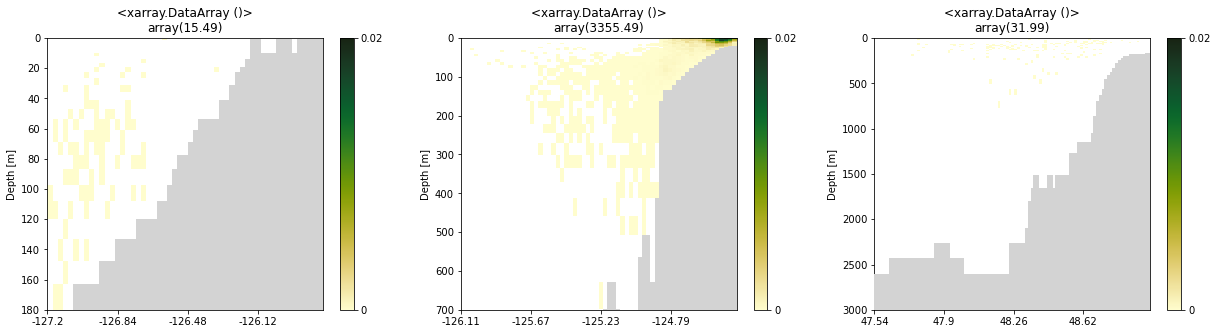

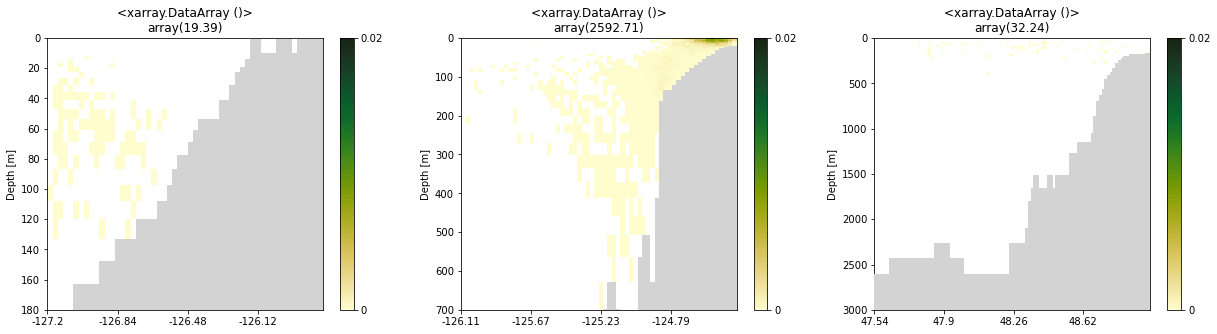

In [33]:
#winter 2016/17
fig, ax = plt.subplots(1,3,figsize=(21,5))

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar17/ariane_positions_quantitative.nc')
time = mydata.init_t[-1]

lons = mydata.final_lon[(mydata.init_temp > 10.7) & (mydata.init_salt <= 32.4) & (mydata.final_section == 2)]
depth = depthf(mydata.final_z[(mydata.init_temp > 10.7) & (mydata.init_salt <= 32.4) & (mydata.final_section == 2)]-1.)[0]
trans = mydata.final_transp[(mydata.init_temp > 10.7) & (mydata.init_salt <= 32.4) & (mydata.final_section == 2)]/time
title = np.round(np.sum(trans),2)
ax[0].set_title(title)
FluxSpecificEW(North[1], North[2], North[3], North[4], ax[0], lons, trans, depth, 0.02)

lons = mydata.final_lon[(mydata.init_temp > 10.7) & (mydata.init_salt <= 32.4) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]
depth = depthf(mydata.final_z[(mydata.init_temp > 10.7) & (mydata.init_salt <= 32.4) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]-1.)[0]
trans = mydata.final_transp[(mydata.init_temp > 10.7) & (mydata.init_salt <= 32.4) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]/time
title = np.round(np.sum(trans),2)
ax[1].set_title(title)
FluxSpecificEW(Sslope[1], Sshelf[2], Sshelf[3], Sslope[4], ax[1], lons, trans, depth, 0.02)

lats = mydata.final_lat[(mydata.init_temp > 10.7) & (mydata.init_salt <= 32.4) & (mydata.final_section == 3)]
depth = depthf(mydata.final_z[(mydata.init_temp > 10.7) & (mydata.init_salt <= 32.4) & (mydata.final_section == 3)]-1.)[0]
trans = mydata.final_transp[(mydata.init_temp > 10.7) & (mydata.init_salt <= 32.4) & (mydata.final_section == 3)]/time
title = np.round(np.sum(trans),2)
ax[2].set_title(title)
FluxSpecificNS(offshore[1], offshore[2], offshore[3], offshore[4], ax[2], lats, trans, depth, 0.02)

#winter 2017/18
fig, ax = plt.subplots(1,3,figsize=(21,5))

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar18/ariane_positions_quantitative.nc')
time = mydata.init_t[-1]

lons = mydata.final_lon[(mydata.init_temp > 9.7) & (mydata.init_salt <= 32.4) & (mydata.final_section == 2)]
depth = depthf(mydata.final_z[(mydata.init_temp > 9.7) & (mydata.init_salt <= 32.4) & (mydata.final_section == 2)]-1.)[0]
trans = mydata.final_transp[(mydata.init_temp > 9.7) & (mydata.init_salt <= 32.4) & (mydata.final_section == 2)]/time
title = np.round(np.sum(trans),2)
ax[0].set_title(title)
FluxSpecificEW(North[1], North[2], North[3], North[4], ax[0], lons, trans, depth, 0.02)

lons = mydata.final_lon[(mydata.init_temp > 9.7) & (mydata.init_salt <= 32.4) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]
depth = depthf(mydata.final_z[(mydata.init_temp > 9.7) & (mydata.init_salt <= 32.4) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]-1.)[0]
trans = mydata.final_transp[(mydata.init_temp > 9.7) & (mydata.init_salt <= 32.4) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]/time
title = np.round(np.sum(trans),2)
ax[1].set_title(title)
FluxSpecificEW(Sslope[1], Sshelf[2], Sshelf[3], Sslope[4], ax[1], lons, trans, depth, 0.02)

lats = mydata.final_lat[(mydata.init_temp > 9.7) & (mydata.init_salt <= 32.4) & (mydata.final_section == 3)]
depth = depthf(mydata.final_z[(mydata.init_temp > 9.7) & (mydata.init_salt <= 32.4) & (mydata.final_section == 3)]-1.)[0]
trans = mydata.final_transp[(mydata.init_temp > 9.7) & (mydata.init_salt <= 32.4) & (mydata.final_section == 3)]/time
title = np.round(np.sum(trans),2)
ax[2].set_title(title)
FluxSpecificNS(offshore[1], offshore[2], offshore[3], offshore[4], ax[2], lats, trans, depth, 0.02)

### fresh and cool - winter only

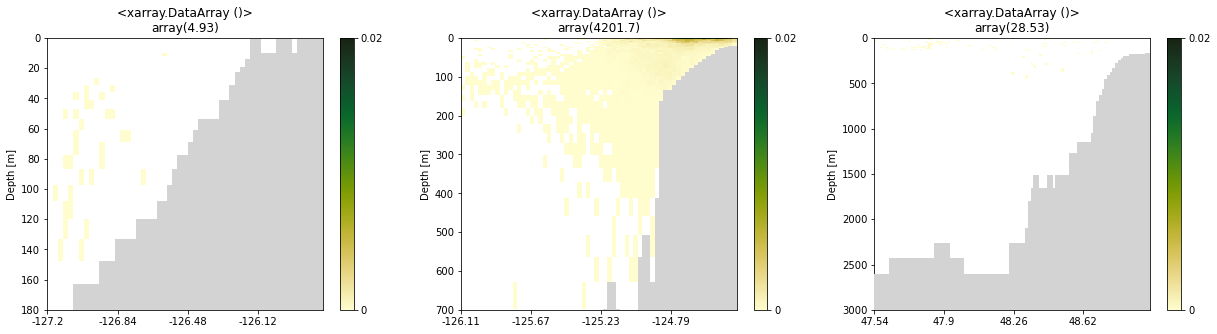

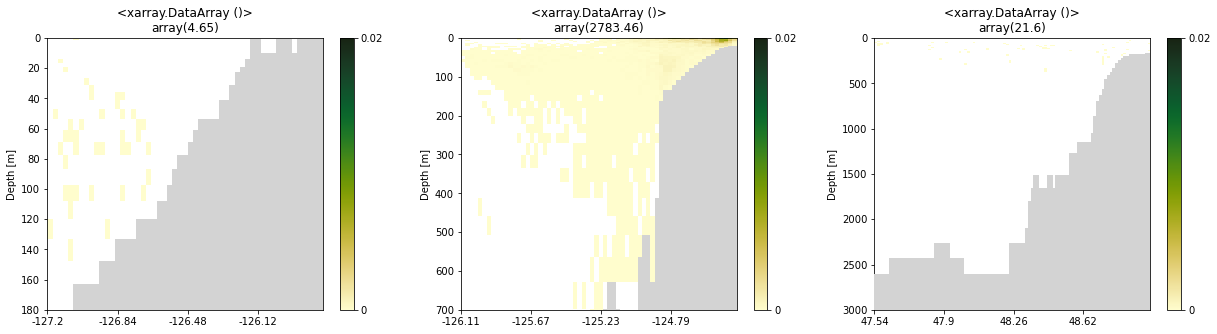

In [34]:
#winter 2016/17
fig, ax = plt.subplots(1,3,figsize=(21,5))

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar17/ariane_positions_quantitative.nc')
time = mydata.init_t[-1]

lons = mydata.final_lon[(mydata.init_temp <= 10.7) & (mydata.init_salt <= 32.4) & (mydata.final_section == 2)]
depth = depthf(mydata.final_z[(mydata.init_temp <= 10.7) & (mydata.init_salt <= 32.4) & (mydata.final_section == 2)]-1.)[0]
trans = mydata.final_transp[(mydata.init_temp <= 10.7) & (mydata.init_salt <= 32.4) & (mydata.final_section == 2)]/time
title = np.round(np.sum(trans),2)
ax[0].set_title(title)
FluxSpecificEW(North[1], North[2], North[3], North[4], ax[0], lons, trans, depth, 0.02)

lons = mydata.final_lon[(mydata.init_temp <= 10.7) & (mydata.init_salt <= 32.4) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]
depth = depthf(mydata.final_z[(mydata.init_temp <= 10.7) & (mydata.init_salt <= 32.4) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]-1.)[0]
trans = mydata.final_transp[(mydata.init_temp <= 10.7) & (mydata.init_salt <= 32.4) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]/time
title = np.round(np.sum(trans),2)
ax[1].set_title(title)
FluxSpecificEW(Sslope[1], Sshelf[2], Sshelf[3], Sslope[4], ax[1], lons, trans, depth, 0.02)

lats = mydata.final_lat[(mydata.init_temp <= 10.7) & (mydata.init_salt <= 32.4) & (mydata.final_section == 3)]
depth = depthf(mydata.final_z[(mydata.init_temp <= 10.7) & (mydata.init_salt <= 32.4) & (mydata.final_section == 3)]-1.)[0]
trans = mydata.final_transp[(mydata.init_temp <= 10.7) & (mydata.init_salt <= 32.4) & (mydata.final_section == 3)]/time
title = np.round(np.sum(trans),2)
ax[2].set_title(title)
FluxSpecificNS(offshore[1], offshore[2], offshore[3], offshore[4], ax[2], lats, trans, depth, 0.02)

#winter 2017/18
fig, ax = plt.subplots(1,3,figsize=(21,5))

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar18/ariane_positions_quantitative.nc')
time = mydata.init_t[-1]

lons = mydata.final_lon[(mydata.init_temp <= 9.7) & (mydata.init_salt <= 32.4) & (mydata.final_section == 2)]
depth = depthf(mydata.final_z[(mydata.init_temp <= 9.7) & (mydata.init_salt <= 32.4) & (mydata.final_section == 2)]-1.)[0]
trans = mydata.final_transp[(mydata.init_temp <= 9.7) & (mydata.init_salt <= 32.4) & (mydata.final_section == 2)]/time
title = np.round(np.sum(trans),2)
ax[0].set_title(title)
FluxSpecificEW(North[1], North[2], North[3], North[4], ax[0], lons, trans, depth, 0.02)

lons = mydata.final_lon[(mydata.init_temp <= 9.7) & (mydata.init_salt <= 32.4) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]
depth = depthf(mydata.final_z[(mydata.init_temp <= 9.7) & (mydata.init_salt <= 32.4) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]-1.)[0]
trans = mydata.final_transp[(mydata.init_temp <= 9.7) & (mydata.init_salt <= 32.4) & np.logical_or(mydata.final_section==4,mydata.final_section==5)]/time
title = np.round(np.sum(trans),2)
ax[1].set_title(title)
FluxSpecificEW(Sslope[1], Sshelf[2], Sshelf[3], Sslope[4], ax[1], lons, trans, depth, 0.02)

lats = mydata.final_lat[(mydata.init_temp <= 9.7) & (mydata.init_salt <= 32.4) & (mydata.final_section == 3)]
depth = depthf(mydata.final_z[(mydata.init_temp <= 9.7) & (mydata.init_salt <= 32.4) & (mydata.final_section == 3)]-1.)[0]
trans = mydata.final_transp[(mydata.init_temp <= 9.7) & (mydata.init_salt <= 32.4) & (mydata.final_section == 3)]/time
title = np.round(np.sum(trans),2)
ax[2].set_title(title)
FluxSpecificNS(offshore[1], offshore[2], offshore[3], offshore[4], ax[2], lats, trans, depth, 0.02)

## Where do these different groups enter JdF??

In [43]:
str(np.round(np.sum(trans[depth<200]),2).values)

'6436.12'

In [44]:
"Summer 2017\nShallow inflow: " + str(np.round(np.sum(trans[depth<200]),2).values) + "\nDeep inflow: "+ str(np.round(np.sum(trans[depth>200]),2).values)

'Summer 2017\nShallow inflow: 6436.12\nDeep inflow: 4127.65'

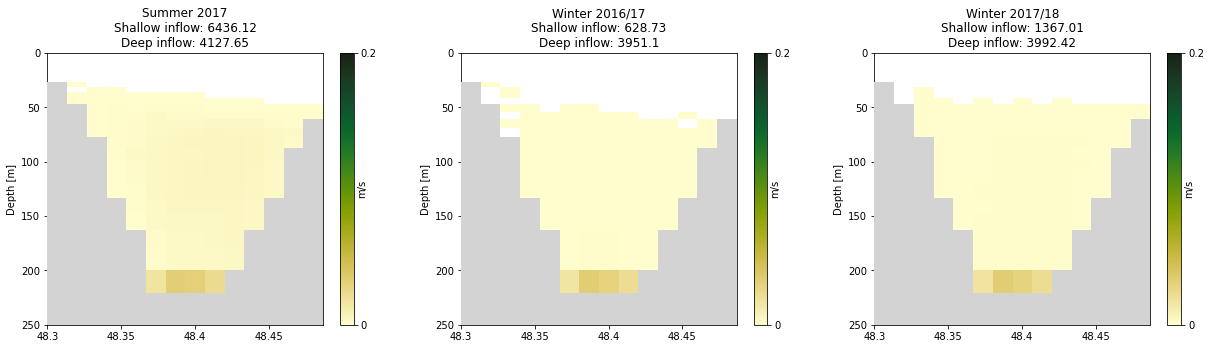

In [46]:
# deep salty salty

#summer 2017
fig, ax = plt.subplots(1,3,figsize=(21,5))

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc')
time = mydata.init_t[-1]

lats = mydata.init_lat[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200)]
depth = depthf(mydata.init_z[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200)]-1.)[0]
trans = mydata.init_transp[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200)]/time
title = "Summer 2017\nShallow inflow: " + str(np.round(np.sum(trans[depth<200]),2).values) + "\nDeep inflow: "+ str(np.round(np.sum(trans[depth>200]),2).values)
ax[0].set_title(title)
FluxSpecificNS(init[1], init[2], init[3], init[4], ax[0], lats, trans, depth, 0.2)


#winter 2016/17

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar17/ariane_positions_quantitative.nc')
time = mydata.init_t[-1]

lats = mydata.init_lat[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200)]
depth = depthf(mydata.init_z[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200)]-1.)[0]
trans = mydata.init_transp[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200)]/time
title = "Winter 2016/17\nShallow inflow: " + str(np.round(np.sum(trans[depth<200]),2).values) + "\nDeep inflow: "+ str(np.round(np.sum(trans[depth>200]),2).values)
ax[1].set_title(title)
FluxSpecificNS(init[1], init[2], init[3], init[4], ax[1], lats, trans, depth, 0.2)

#winter 2017/18

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar18/ariane_positions_quantitative.nc')
time = mydata.init_t[-1]

lats = mydata.init_lat[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200)]
depth = depthf(mydata.init_z[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200)]-1.)[0]
trans = mydata.init_transp[(mydata.init_salt > 32.4) & (mydata.final_depth <= -200)]/time
title = "Winter 2017/18\nShallow inflow: " + str(np.round(np.sum(trans[depth<200]),2).values) + "\nDeep inflow: "+ str(np.round(np.sum(trans[depth>200]),2).values)
ax[2].set_title(title)
FluxSpecificNS(init[1], init[2], init[3], init[4], ax[2], lats, trans, depth, 0.2)

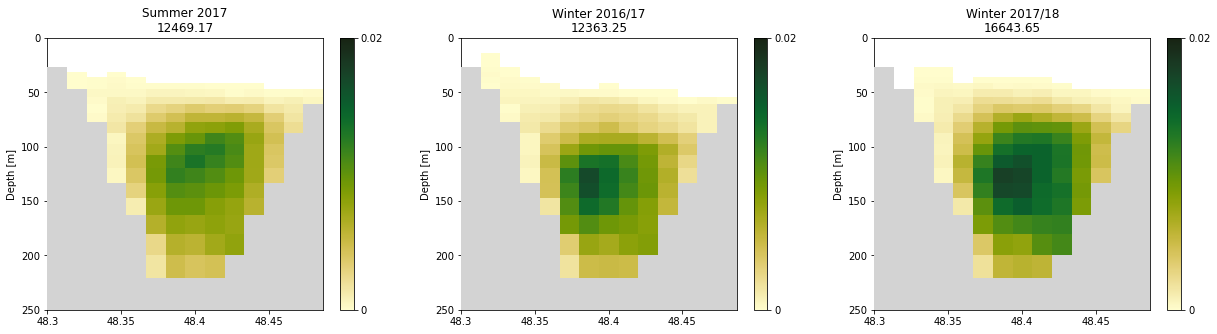

In [19]:
# shallow salty salty

#summer 2017
fig, ax = plt.subplots(1,3,figsize=(21,5))

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc')
time = mydata.init_t[-1]

lats = mydata.init_lat[np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0])) & (mydata.final_section != 0) & (mydata.init_salt > 32.4) & (mydata.final_depth > -200)]
depth = depthf(mydata.init_z[np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0])) & (mydata.final_section != 0) & (mydata.init_salt > 32.4) & (mydata.final_depth > -200)]-1.)[0]
trans = mydata.init_transp[np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0])) & (mydata.final_section != 0) & (mydata.init_salt > 32.4) & (mydata.final_depth > -200)]/time
title = "Summer 2017\n" + str(np.round(np.sum(trans),2).values)
ax[0].set_title(title)
FluxSpecificNS(init[1], init[2], init[3], init[4], ax[0], lats, trans, depth, 0.02)


#winter 2016/17

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar17/ariane_positions_quantitative.nc')
time = mydata.init_t[-1]

lats = mydata.init_lat[np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0])) & (mydata.final_section != 0) & (mydata.init_salt > 32.4) & (mydata.final_depth > -200)]
depth = depthf(mydata.init_z[np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0])) & (mydata.final_section != 0) & (mydata.init_salt > 32.4) & (mydata.final_depth > -200)]-1.)[0]
trans = mydata.init_transp[np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0])) & (mydata.final_section != 0) & (mydata.init_salt > 32.4) & (mydata.final_depth > -200)]/time
title = "Winter 2016/17\n" + str(np.round(np.sum(trans),2).values)
ax[1].set_title(title)
FluxSpecificNS(init[1], init[2], init[3], init[4], ax[1], lats, trans, depth, 0.02)

#winter 2017/18

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar18/ariane_positions_quantitative.nc')
time = mydata.init_t[-1]

lats = mydata.init_lat[np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0])) & (mydata.final_section != 0) & (mydata.init_salt > 32.4) & (mydata.final_depth > -200)]
depth = depthf(mydata.init_z[np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0])) & (mydata.final_section != 0) & (mydata.init_salt > 32.4) & (mydata.final_depth > -200)]-1.)[0]
trans = mydata.init_transp[np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0])) & (mydata.final_section != 0) & (mydata.init_salt > 32.4) & (mydata.final_depth > -200)]/time
title = "Winter 2017/18\n" + str(np.round(np.sum(trans),2).values)
ax[2].set_title(title)
FluxSpecificNS(init[1], init[2], init[3], init[4], ax[2], lats, trans, depth, 0.02)

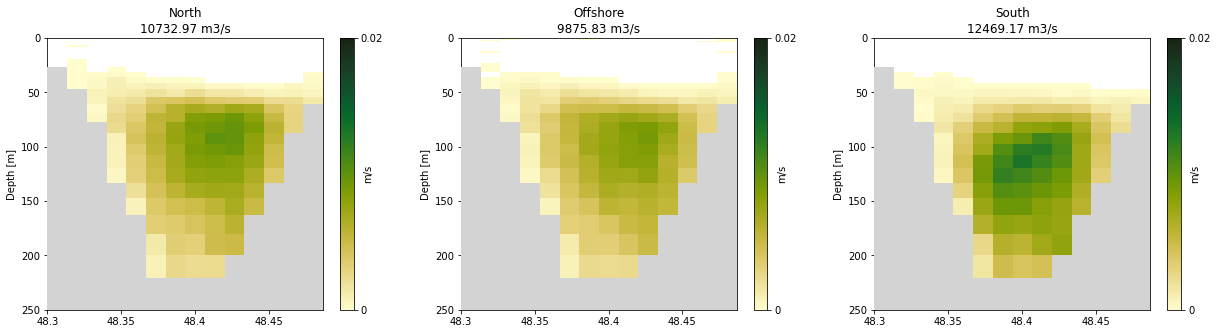

In [7]:
# do the shallow salty salty from different directions in the summer of 2017 enter the JdF differently????
# shallow salty salty

fig, ax = plt.subplots(1,3,figsize=(21,5))

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc')
time = mydata.init_t[-1]

lats = mydata.init_lat[(mydata.final_section == North[0])]
depth = depthf(mydata.init_z[(mydata.final_section == North[0])]-1.)[0]
trans = mydata.init_transp[(mydata.final_section == North[0])]/time
title = "North\n" + str(np.round(np.sum(trans),2).values) + ' m3/s'
ax[0].set_title(title)
FluxSpecificNS(init[1], init[2], init[3], init[4], ax[0], lats, trans, depth, 0.02)

lats = mydata.init_lat[(mydata.final_section == offshore[0])]
depth = depthf(mydata.init_z[(mydata.final_section == offshore[0])]-1.)[0]
trans = mydata.init_transp[(mydata.final_section == offshore[0])]/time
title = "Offshore\n" + str(np.round(np.sum(trans),2).values) + ' m3/s'
ax[1].set_title(title)
FluxSpecificNS(init[1], init[2], init[3], init[4], ax[1], lats, trans, depth, 0.02)

lats = mydata.init_lat[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]
depth = depthf(mydata.init_z[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]-1.)[0]
trans = mydata.init_transp[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]/time
title = "South\n" + str(np.round(np.sum(trans),2).values) + ' m3/s'
ax[2].set_title(title)
FluxSpecificNS(init[1], init[2], init[3], init[4], ax[2], lats, trans, depth, 0.02)

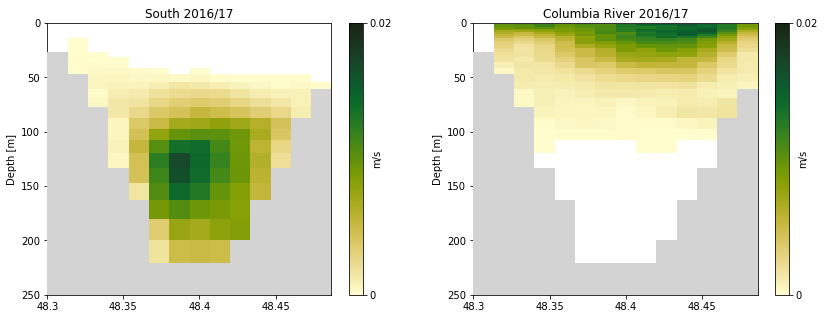

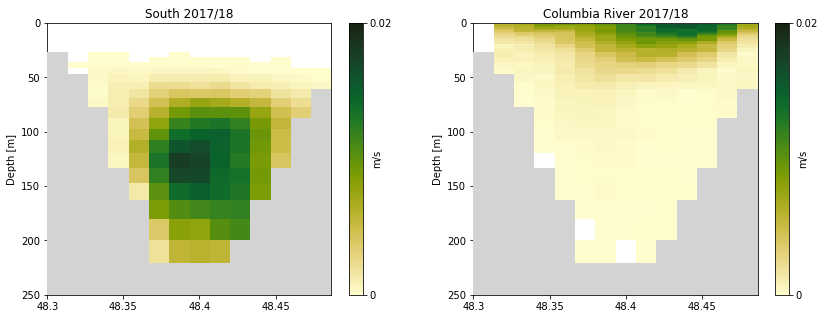

In [14]:
# one plot of fresh and south entering JdF in the winter
# 2016/17
fig, ax = plt.subplots(1,2,figsize=(14,5))

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar17/ariane_positions_quantitative.nc')
time = mydata.init_t[-1]

lats = mydata.init_lat[(mydata.init_salt >= 32) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]
depth = depthf(mydata.init_z[(mydata.init_salt >= 32) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]-1.)[0]
trans = mydata.init_transp[(mydata.init_salt >= 32) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]/time
# title = "South\n" + str(np.round(np.sum(trans),0).values)
title = "South 2016/17"
ax[0].set_title(title)
FluxSpecificNS(init[1], init[2], init[3], init[4], ax[0], lats, trans, depth, 0.02)

lats = mydata.init_lat[(mydata.init_salt < 32) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]
depth = depthf(mydata.init_z[(mydata.init_salt < 32) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]-1.)[0]
trans = mydata.init_transp[(mydata.init_salt < 32) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]/time
# title = "Columbia River\n" + str(np.round(np.sum(trans),0).values)
title = "Columbia River 2016/17"
ax[1].set_title(title)
FluxSpecificNS(init[1], init[2], init[3], init[4], ax[1], lats, trans, depth, 0.02)

# 2017/18
fig, ax = plt.subplots(1,2,figsize=(14,5))

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar18/ariane_positions_quantitative.nc')
time = mydata.init_t[-1]

lats = mydata.init_lat[(mydata.init_salt >= 32) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]
depth = depthf(mydata.init_z[(mydata.init_salt >= 32) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]-1.)[0]
trans = mydata.init_transp[(mydata.init_salt >= 32) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]/time
# title = "South\n" + str(np.round(np.sum(trans),0).values)
title = "South 2017/18"
ax[0].set_title(title)
FluxSpecificNS(init[1], init[2], init[3], init[4], ax[0], lats, trans, depth, 0.02)

lats = mydata.init_lat[(mydata.init_salt < 32) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]
depth = depthf(mydata.init_z[(mydata.init_salt < 32) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]-1.)[0]
trans = mydata.init_transp[(mydata.init_salt < 32) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]/time
# title = "Columbia River\n" + str(np.round(np.sum(trans),0).values)
title = "Columbia River 2017/18"
ax[1].set_title(title)
FluxSpecificNS(init[1], init[2], init[3], init[4], ax[1], lats, trans, depth, 0.02)

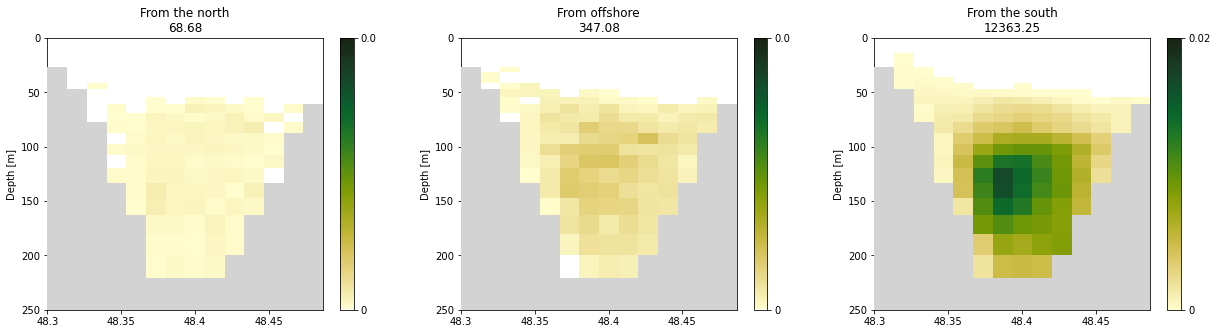

In [55]:
# do these enter in the same locaiton in the winter?
# 2017/18

fig, ax = plt.subplots(1,3,figsize=(21,5))

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar17/ariane_positions_quantitative.nc')
time = mydata.init_t[-1]

lats = mydata.init_lat[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & (mydata.final_section == North[0])]
depth = depthf(mydata.init_z[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & (mydata.final_section == North[0])]-1.)[0]
trans = mydata.init_transp[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & (mydata.final_section == North[0])]/time
title = "From the north\n" + str(np.round(np.sum(trans),2).values)
ax[0].set_title(title)
FluxSpecificNS(init[1], init[2], init[3], init[4], ax[0], lats, trans, depth, 0.002)

lats = mydata.init_lat[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & (mydata.final_section == offshore[0])]
depth = depthf(mydata.init_z[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & (mydata.final_section == offshore[0])]-1.)[0]
trans = mydata.init_transp[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & (mydata.final_section == offshore[0])]/time
title = "From offshore\n" + str(np.round(np.sum(trans),2).values)
ax[1].set_title(title)
FluxSpecificNS(init[1], init[2], init[3], init[4], ax[1], lats, trans, depth, 0.002)

lats = mydata.init_lat[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]
depth = depthf(mydata.init_z[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]-1.)[0]
trans = mydata.init_transp[(mydata.init_salt > 32.4) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]/time
title = "From the south\n" + str(np.round(np.sum(trans),2).values)
ax[2].set_title(title)
FluxSpecificNS(init[1], init[2], init[3], init[4], ax[2], lats, trans, depth, 0.02)

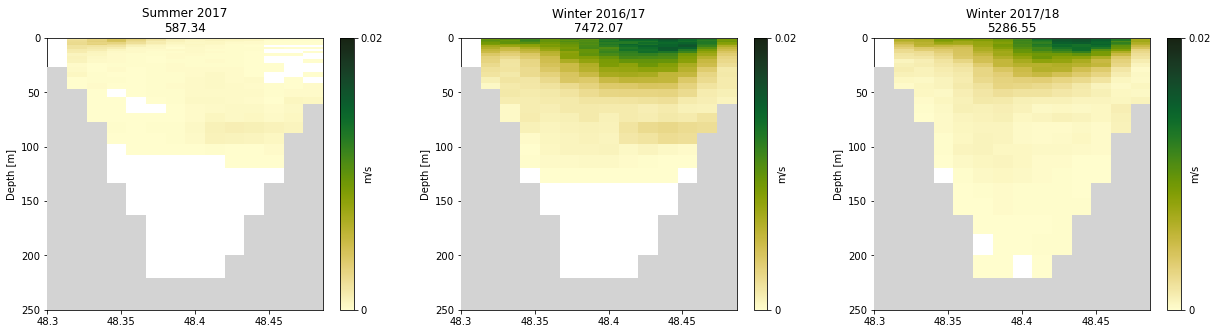

In [16]:
# fresh

#summer 2017
fig, ax = plt.subplots(1,3,figsize=(21,5))

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc')
time = mydata.init_t[-1]

lats = mydata.init_lat[(mydata.init_salt <= 32.4) & (mydata.final_depth > -200)& np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]
depth = depthf(mydata.init_z[(mydata.init_salt <= 32.4) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]-1.)[0]
trans = mydata.init_transp[(mydata.init_salt <= 32.4) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]/time
title = "Summer 2017\n" + str(np.round(np.sum(trans),2).values)
ax[0].set_title(title)
FluxSpecificNS(init[1], init[2], init[3], init[4], ax[0], lats, trans, depth, 0.02)


#winter 2016/17

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar17/ariane_positions_quantitative.nc')
time = mydata.init_t[-1]

lats = mydata.init_lat[(mydata.init_salt <= 32.4) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]
depth = depthf(mydata.init_z[(mydata.init_salt <= 32.4) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]-1.)[0]
trans = mydata.init_transp[(mydata.init_salt <= 32.4) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]/time
title = "Winter 2016/17\n" + str(np.round(np.sum(trans),2).values)
ax[1].set_title(title)
FluxSpecificNS(init[1], init[2], init[3], init[4], ax[1], lats, trans, depth, 0.02)

#winter 2017/18

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar18/ariane_positions_quantitative.nc')
time = mydata.init_t[-1]

lats = mydata.init_lat[(mydata.init_salt <= 32.4) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]
depth = depthf(mydata.init_z[(mydata.init_salt <= 32.4) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]-1.)[0]
trans = mydata.init_transp[(mydata.init_salt <= 32.4) & (mydata.final_depth > -200) & np.logical_or((mydata.final_section == Sshelf[0]),(mydata.final_section == Sslope[0]))]/time
title = "Winter 2017/18\n" + str(np.round(np.sum(trans),2).values)
ax[2].set_title(title)
FluxSpecificNS(init[1], init[2], init[3], init[4], ax[2], lats, trans, depth, 0.02)